# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from math import cos, pi


df=pd.read_excel('Coronavirus.xlsx')
df

Country                Other names ISO 3166-1 alpha-3 CODE  \
0          Afghanistan                Afghanistan                     AFG   
1              Albania                    Albania                     ALB   
2              Algeria                    Algeria                     DZA   
3              Andorra                    Andorra                     AND   
4               Angola                     Angola                     AGO   
..                 ...                        ...                     ...   
220  Wallis and Futuna  Wallis and Futuna Islands                     WLF   
221     Western Sahara             Western Sahara                 ESHÃ‚Â    
222              Yemen                      Yemen                     YEM   
223             Zambia                     Zambia                     ZMB   
224           Zimbabwe                   Zimbabwe                     ZWE   

     Population Continent  Total Cases  Total Deaths  Total Cases/1M pop  \
0      40462186      Asia       177827          7671                4395   
1       2872296    Europe       273870          3492               95349   
2      45236699    Africa       265691          6874                5873   
3         77481    Europe        40024           153              516565   
4      34654212    Africa        99194          1900                2862   
..          ...       ...          ...           ...                 ...   
220       10894   Oceania          454             7               41674   
221      623031    Africa           10             1                  16   
222    30975258      Asia        11806          2143                 381   
223    19284482    Africa       317076          3967               16442   
224    15241601    Africa       246525          5446               16174   

     Total Deaths/1M pop  Death percentage  
0                    190          4.313743  
1                   1216          1.275058  
2                    152          2.587216  
3                   1975          0.382271  
4                     55          1.915438  
..                   ...               ...  
220                  643          1.541850  
221                    2         10.000000  
222                   69         18.151787  
223                  206          1.251120  
224                  357          2.209107  

[225 rows x 10 columns]

In [2]:
rows = len(df.axes[0])
cols = len(df.axes[1])
  
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 225
Number of Columns: 10


In [3]:
cases = df["Total Cases"]
deaths = df["Total Deaths"]
percentage = df["Death percentage"]

In [4]:
range_of_cases = np.max(cases) - np.min(cases)
range_of_deaths = np.max(deaths) - np.min(deaths)
range_of_percentage = np.max(percentage) - np.min(percentage)

In [5]:
print("Range of the total cases:", range_of_cases)
print("Range of the total deaths:", range_of_deaths)
print("Range of the deaths percentage:", range_of_percentage)

Range of the total cases: 81839051
Range of the total deaths: 1008222
Range of the deaths percentage: 18.15178723


In [6]:
print(df.isnull().sum())

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Total Cases/1M pop         0
Total Deaths/1M pop        0
Death percentage           0
dtype: int64


In [7]:
df = df.replace('?',np.NaN)

print('\nNumber of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))


Number of instances = 225
Number of attributes = 10
Number of missing values:
	Country: 0
	Other names: 1
	ISO 3166-1 alpha-3 CODE: 0
	Population: 0
	Continent: 0
	Total Cases: 0
	Total Deaths: 0
	Total Cases/1M pop: 0
	Total Deaths/1M pop: 0
	Death percentage: 0


In [8]:
df["Other names"].fillna("NaN", inplace=True)

In [9]:
df= df.replace('?',np.NaN)

print('\nNumber of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))


Number of instances = 225
Number of attributes = 10
Number of missing values:
	Country: 0
	Other names: 0
	ISO 3166-1 alpha-3 CODE: 0
	Population: 0
	Continent: 0
	Total Cases: 0
	Total Deaths: 0
	Total Cases/1M pop: 0
	Total Deaths/1M pop: 0
	Death percentage: 0


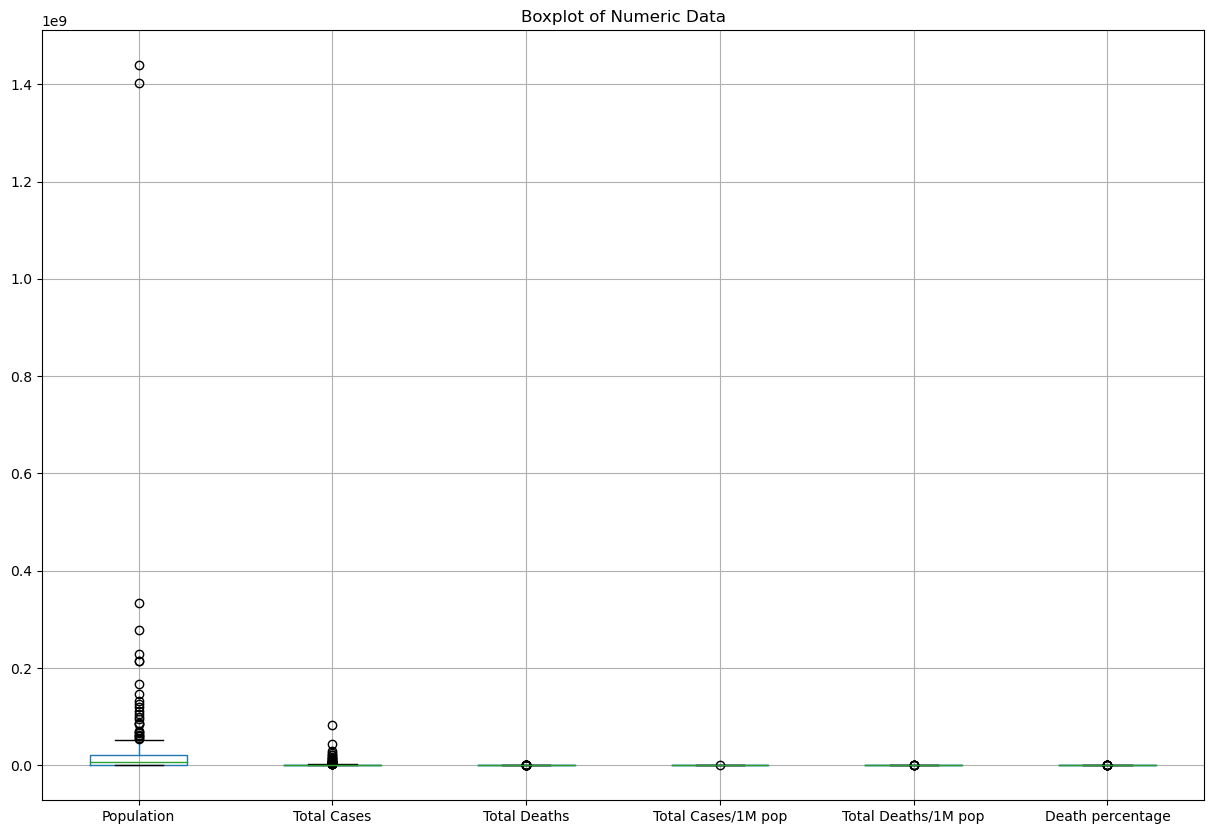

In [10]:
plt.figure(figsize=(15, 10)) 
df.boxplot()
plt.title('Boxplot of Numeric Data')
plt.show()

In [11]:
result = zscore (df.Population)
df['z-score Population'] = result

result1 = zscore (df['Total Cases'])
df['z-score Total Cases'] = result

result2 = zscore (df['Total Deaths'])
df['z-score Total Deaths'] = result

result3 = zscore (df['Total Cases/1M pop'])
df['z-score Total Cases/1M pop'] = result

result4 = zscore (df['Total Deaths/1M pop'])
df['z-score Total Deaths/1M pop'] = result

result5 = zscore (df['Death percentage'])
df['z-score Death percentage'] = result

In [12]:
df.head()

Country  Other names ISO 3166-1 alpha-3 CODE  Population Continent  \
0  Afghanistan  Afghanistan                     AFG    40462186      Asia   
1      Albania      Albania                     ALB     2872296    Europe   
2      Algeria      Algeria                     DZA    45236699    Africa   
3      Andorra      Andorra                     AND       77481    Europe   
4       Angola       Angola                     AGO    34654212    Africa   

   Total Cases  Total Deaths  Total Cases/1M pop  Total Deaths/1M pop  \
0       177827          7671                4395                  190   
1       273870          3492               95349                 1216   
2       265691          6874                5873                  152   
3        40024           153              516565                 1975   
4        99194          1900                2862                   55   

   Death percentage  z-score Population  z-score Total Cases  \
0          4.313743            0.038789             0.038789   
1          1.275058           -0.231774            -0.231774   
2          2.587216            0.073154             0.073154   
3          0.382271           -0.251891            -0.251891   
4          1.915438           -0.003016            -0.003016   

   z-score Total Deaths  z-score Total Cases/1M pop  \
0              0.038789                    0.038789   
1             -0.231774                   -0.231774   
2              0.073154                    0.073154   
3             -0.251891                   -0.251891   
4             -0.003016                   -0.003016   

   z-score Total Deaths/1M pop  z-score Death percentage  
0                     0.038789                  0.038789  
1                    -0.231774                 -0.231774  
2                     0.073154                  0.073154  
3                    -0.251891                 -0.251891  
4                    -0.003016                 -0.003016

In [13]:
display(df[~((df['z-score Population'] < 3) & (df['z-score Population'] > -3))])

df_noOutliers = df[((df['z-score Population'] < 3) & (df['z-score Population'] > -3))]
display(df_noOutliers)

Country Other names ISO 3166-1 alpha-3 CODE  Population Continent  \
42   China       China                     CHN  1439323776      Asia   
92   India       India                     IND  1403754381      Asia   

    Total Cases  Total Deaths  Total Cases/1M pop  Total Deaths/1M pop  \
42       154738          4638                 108                    3   
92     43029044        521388               30653                  371   

    Death percentage  z-score Population  z-score Total Cases  \
42          2.997325           10.107461            10.107461   
92          1.211712            9.851441             9.851441   

    z-score Total Deaths  z-score Total Cases/1M pop  \
42             10.107461                   10.107461   
92              9.851441                    9.851441   

    z-score Total Deaths/1M pop  z-score Death percentage  
42                    10.107461                 10.107461  
92                     9.851441                  9.851441

Country                Other names ISO 3166-1 alpha-3 CODE  \
0          Afghanistan                Afghanistan                     AFG   
1              Albania                    Albania                     ALB   
2              Algeria                    Algeria                     DZA   
3              Andorra                    Andorra                     AND   
4               Angola                     Angola                     AGO   
..                 ...                        ...                     ...   
220  Wallis and Futuna  Wallis and Futuna Islands                     WLF   
221     Western Sahara             Western Sahara                 ESHÃ‚Â    
222              Yemen                      Yemen                     YEM   
223             Zambia                     Zambia                     ZMB   
224           Zimbabwe                   Zimbabwe                     ZWE   

     Population Continent  Total Cases  Total Deaths  Total Cases/1M pop  \
0      40462186      Asia       177827          7671                4395   
1       2872296    Europe       273870          3492               95349   
2      45236699    Africa       265691          6874                5873   
3         77481    Europe        40024           153              516565   
4      34654212    Africa        99194          1900                2862   
..          ...       ...          ...           ...                 ...   
220       10894   Oceania          454             7               41674   
221      623031    Africa           10             1                  16   
222    30975258      Asia        11806          2143                 381   
223    19284482    Africa       317076          3967               16442   
224    15241601    Africa       246525          5446               16174   

     Total Deaths/1M pop  Death percentage  z-score Population  \
0                    190          4.313743            0.038789   
1                   1216          1.275058           -0.231774   
2                    152          2.587216            0.073154   
3                   1975          0.382271           -0.251891   
4                     55          1.915438           -0.003016   
..                   ...               ...                 ...   
220                  643          1.541850           -0.252370   
221                    2         10.000000           -0.247964   
222                   69         18.151787           -0.029496   
223                  206          1.251120           -0.113643   
224                  357          2.209107           -0.142743   

     z-score Total Cases  z-score Total Deaths  z-score Total Cases/1M pop  \
0               0.038789              0.038789                    0.038789   
1              -0.231774             -0.231774                   -0.231774   
2               0.073154              0.073154                    0.073154   
3              -0.251891             -0.251891                   -0.251891   
4              -0.003016             -0.003016                   -0.003016   
..                   ...                   ...                         ...   
220            -0.252370             -0.252370                   -0.252370   
221            -0.247964             -0.247964                   -0.247964   
222            -0.029496             -0.029496                   -0.029496   
223            -0.113643             -0.113643                   -0.113643   
224            -0.142743             -0.142743                   -0.142743   

     z-score Total Deaths/1M pop  z-score Death percentage  
0                       0.038789                  0.038789  
1                      -0.231774                 -0.231774  
2                       0.073154                  0.073154  
3                      -0.251891                 -0.251891  
4                      -0.003016                 -0.003016  
..                           ...                       ...  
220                 

In [14]:
display(df[~((df['z-score Total Cases'] < 3) & (df['z-score Total Cases'] > -3))])

df_noOutliers = df[((df['z-score Total Cases'] < 3) & (df['z-score Total Cases'] > -3))]
display(df_noOutliers)

Country Other names ISO 3166-1 alpha-3 CODE  Population Continent  \
42   China       China                     CHN  1439323776      Asia   
92   India       India                     IND  1403754381      Asia   

    Total Cases  Total Deaths  Total Cases/1M pop  Total Deaths/1M pop  \
42       154738          4638                 108                    3   
92     43029044        521388               30653                  371   

    Death percentage  z-score Population  z-score Total Cases  \
42          2.997325           10.107461            10.107461   
92          1.211712            9.851441             9.851441   

    z-score Total Deaths  z-score Total Cases/1M pop  \
42             10.107461                   10.107461   
92              9.851441                    9.851441   

    z-score Total Deaths/1M pop  z-score Death percentage  
42                    10.107461                 10.107461  
92                     9.851441                  9.851441

Country                Other names ISO 3166-1 alpha-3 CODE  \
0          Afghanistan                Afghanistan                     AFG   
1              Albania                    Albania                     ALB   
2              Algeria                    Algeria                     DZA   
3              Andorra                    Andorra                     AND   
4               Angola                     Angola                     AGO   
..                 ...                        ...                     ...   
220  Wallis and Futuna  Wallis and Futuna Islands                     WLF   
221     Western Sahara             Western Sahara                 ESHÃ‚Â    
222              Yemen                      Yemen                     YEM   
223             Zambia                     Zambia                     ZMB   
224           Zimbabwe                   Zimbabwe                     ZWE   

     Population Continent  Total Cases  Total Deaths  Total Cases/1M pop  \
0      40462186      Asia       177827          7671                4395   
1       2872296    Europe       273870          3492               95349   
2      45236699    Africa       265691          6874                5873   
3         77481    Europe        40024           153              516565   
4      34654212    Africa        99194          1900                2862   
..          ...       ...          ...           ...                 ...   
220       10894   Oceania          454             7               41674   
221      623031    Africa           10             1                  16   
222    30975258      Asia        11806          2143                 381   
223    19284482    Africa       317076          3967               16442   
224    15241601    Africa       246525          5446               16174   

     Total Deaths/1M pop  Death percentage  z-score Population  \
0                    190          4.313743            0.038789   
1                   1216          1.275058           -0.231774   
2                    152          2.587216            0.073154   
3                   1975          0.382271           -0.251891   
4                     55          1.915438           -0.003016   
..                   ...               ...                 ...   
220                  643          1.541850           -0.252370   
221                    2         10.000000           -0.247964   
222                   69         18.151787           -0.029496   
223                  206          1.251120           -0.113643   
224                  357          2.209107           -0.142743   

     z-score Total Cases  z-score Total Deaths  z-score Total Cases/1M pop  \
0               0.038789              0.038789                    0.038789   
1              -0.231774             -0.231774                   -0.231774   
2               0.073154              0.073154                    0.073154   
3              -0.251891             -0.251891                   -0.251891   
4              -0.003016             -0.003016                   -0.003016   
..                   ...                   ...                         ...   
220            -0.252370             -0.252370                   -0.252370   
221            -0.247964             -0.247964                   -0.247964   
222            -0.029496             -0.029496                   -0.029496   
223            -0.113643             -0.113643                   -0.113643   
224            -0.142743             -0.142743                   -0.142743   

     z-score Total Deaths/1M pop  z-score Death percentage  
0                       0.038789                  0.038789  
1                      -0.231774                 -0.231774  
2                       0.073154                  0.073154  
3                      -0.251891                 -0.251891  
4                      -0.003016                 -0.003016  
..                           ...                       ...  
220                 

In [15]:
display(df[~((df['z-score Total Deaths'] < 3) & (df['z-score Total Deaths'] > -3))])

df_noOutliers = df[((df['z-score Total Deaths'] < 3) & (df['z-score Total Deaths'] > -3))]
display(df_noOutliers)

Country Other names ISO 3166-1 alpha-3 CODE  Population Continent  \
42   China       China                     CHN  1439323776      Asia   
92   India       India                     IND  1403754381      Asia   

    Total Cases  Total Deaths  Total Cases/1M pop  Total Deaths/1M pop  \
42       154738          4638                 108                    3   
92     43029044        521388               30653                  371   

    Death percentage  z-score Population  z-score Total Cases  \
42          2.997325           10.107461            10.107461   
92          1.211712            9.851441             9.851441   

    z-score Total Deaths  z-score Total Cases/1M pop  \
42             10.107461                   10.107461   
92              9.851441                    9.851441   

    z-score Total Deaths/1M pop  z-score Death percentage  
42                    10.107461                 10.107461  
92                     9.851441                  9.851441

Country                Other names ISO 3166-1 alpha-3 CODE  \
0          Afghanistan                Afghanistan                     AFG   
1              Albania                    Albania                     ALB   
2              Algeria                    Algeria                     DZA   
3              Andorra                    Andorra                     AND   
4               Angola                     Angola                     AGO   
..                 ...                        ...                     ...   
220  Wallis and Futuna  Wallis and Futuna Islands                     WLF   
221     Western Sahara             Western Sahara                 ESHÃ‚Â    
222              Yemen                      Yemen                     YEM   
223             Zambia                     Zambia                     ZMB   
224           Zimbabwe                   Zimbabwe                     ZWE   

     Population Continent  Total Cases  Total Deaths  Total Cases/1M pop  \
0      40462186      Asia       177827          7671                4395   
1       2872296    Europe       273870          3492               95349   
2      45236699    Africa       265691          6874                5873   
3         77481    Europe        40024           153              516565   
4      34654212    Africa        99194          1900                2862   
..          ...       ...          ...           ...                 ...   
220       10894   Oceania          454             7               41674   
221      623031    Africa           10             1                  16   
222    30975258      Asia        11806          2143                 381   
223    19284482    Africa       317076          3967               16442   
224    15241601    Africa       246525          5446               16174   

     Total Deaths/1M pop  Death percentage  z-score Population  \
0                    190          4.313743            0.038789   
1                   1216          1.275058           -0.231774   
2                    152          2.587216            0.073154   
3                   1975          0.382271           -0.251891   
4                     55          1.915438           -0.003016   
..                   ...               ...                 ...   
220                  643          1.541850           -0.252370   
221                    2         10.000000           -0.247964   
222                   69         18.151787           -0.029496   
223                  206          1.251120           -0.113643   
224                  357          2.209107           -0.142743   

     z-score Total Cases  z-score Total Deaths  z-score Total Cases/1M pop  \
0               0.038789              0.038789                    0.038789   
1              -0.231774             -0.231774                   -0.231774   
2               0.073154              0.073154                    0.073154   
3              -0.251891             -0.251891                   -0.251891   
4              -0.003016             -0.003016                   -0.003016   
..                   ...                   ...                         ...   
220            -0.252370             -0.252370                   -0.252370   
221            -0.247964             -0.247964                   -0.247964   
222            -0.029496             -0.029496                   -0.029496   
223            -0.113643             -0.113643                   -0.113643   
224            -0.142743             -0.142743                   -0.142743   

     z-score Total Deaths/1M pop  z-score Death percentage  
0                       0.038789                  0.038789  
1                      -0.231774                 -0.231774  
2                       0.073154                  0.073154  
3                      -0.251891                 -0.251891  
4                      -0.003016                 -0.003016  
..                           ...                       ...  
220                 

In [16]:
display(df[~((df['z-score Total Cases/1M pop'] < 3) & (df['z-score Total Cases/1M pop'] > -3))])

df_noOutliers = df[((df['z-score Total Cases/1M pop'] < 3) & (df['z-score Total Cases/1M pop'] > -3))]
display(df_noOutliers)

Country Other names ISO 3166-1 alpha-3 CODE  Population Continent  \
42   China       China                     CHN  1439323776      Asia   
92   India       India                     IND  1403754381      Asia   

    Total Cases  Total Deaths  Total Cases/1M pop  Total Deaths/1M pop  \
42       154738          4638                 108                    3   
92     43029044        521388               30653                  371   

    Death percentage  z-score Population  z-score Total Cases  \
42          2.997325           10.107461            10.107461   
92          1.211712            9.851441             9.851441   

    z-score Total Deaths  z-score Total Cases/1M pop  \
42             10.107461                   10.107461   
92              9.851441                    9.851441   

    z-score Total Deaths/1M pop  z-score Death percentage  
42                    10.107461                 10.107461  
92                     9.851441                  9.851441

Country                Other names ISO 3166-1 alpha-3 CODE  \
0          Afghanistan                Afghanistan                     AFG   
1              Albania                    Albania                     ALB   
2              Algeria                    Algeria                     DZA   
3              Andorra                    Andorra                     AND   
4               Angola                     Angola                     AGO   
..                 ...                        ...                     ...   
220  Wallis and Futuna  Wallis and Futuna Islands                     WLF   
221     Western Sahara             Western Sahara                 ESHÃ‚Â    
222              Yemen                      Yemen                     YEM   
223             Zambia                     Zambia                     ZMB   
224           Zimbabwe                   Zimbabwe                     ZWE   

     Population Continent  Total Cases  Total Deaths  Total Cases/1M pop  \
0      40462186      Asia       177827          7671                4395   
1       2872296    Europe       273870          3492               95349   
2      45236699    Africa       265691          6874                5873   
3         77481    Europe        40024           153              516565   
4      34654212    Africa        99194          1900                2862   
..          ...       ...          ...           ...                 ...   
220       10894   Oceania          454             7               41674   
221      623031    Africa           10             1                  16   
222    30975258      Asia        11806          2143                 381   
223    19284482    Africa       317076          3967               16442   
224    15241601    Africa       246525          5446               16174   

     Total Deaths/1M pop  Death percentage  z-score Population  \
0                    190          4.313743            0.038789   
1                   1216          1.275058           -0.231774   
2                    152          2.587216            0.073154   
3                   1975          0.382271           -0.251891   
4                     55          1.915438           -0.003016   
..                   ...               ...                 ...   
220                  643          1.541850           -0.252370   
221                    2         10.000000           -0.247964   
222                   69         18.151787           -0.029496   
223                  206          1.251120           -0.113643   
224                  357          2.209107           -0.142743   

     z-score Total Cases  z-score Total Deaths  z-score Total Cases/1M pop  \
0               0.038789              0.038789                    0.038789   
1              -0.231774             -0.231774                   -0.231774   
2               0.073154              0.073154                    0.073154   
3              -0.251891             -0.251891                   -0.251891   
4              -0.003016             -0.003016                   -0.003016   
..                   ...                   ...                         ...   
220            -0.252370             -0.252370                   -0.252370   
221            -0.247964             -0.247964                   -0.247964   
222            -0.029496             -0.029496                   -0.029496   
223            -0.113643             -0.113643                   -0.113643   
224            -0.142743             -0.142743                   -0.142743   

     z-score Total Deaths/1M pop  z-score Death percentage  
0                       0.038789                  0.038789  
1                      -0.231774                 -0.231774  
2                       0.073154                  0.073154  
3                      -0.251891                 -0.251891  
4                      -0.003016                 -0.003016  
..                           ...                       ...  
220                 

In [17]:
display(df[~((df['z-score Total Deaths/1M pop'] < 3) & (df['z-score Total Deaths/1M pop'] > -3))])

data1_noOutliers = df[((df['z-score Total Deaths/1M pop'] < 3) & (df['z-score Total Deaths/1M pop'] > -3))]
display(df_noOutliers)

Country Other names ISO 3166-1 alpha-3 CODE  Population Continent  \
42   China       China                     CHN  1439323776      Asia   
92   India       India                     IND  1403754381      Asia   

    Total Cases  Total Deaths  Total Cases/1M pop  Total Deaths/1M pop  \
42       154738          4638                 108                    3   
92     43029044        521388               30653                  371   

    Death percentage  z-score Population  z-score Total Cases  \
42          2.997325           10.107461            10.107461   
92          1.211712            9.851441             9.851441   

    z-score Total Deaths  z-score Total Cases/1M pop  \
42             10.107461                   10.107461   
92              9.851441                    9.851441   

    z-score Total Deaths/1M pop  z-score Death percentage  
42                    10.107461                 10.107461  
92                     9.851441                  9.851441

Country                Other names ISO 3166-1 alpha-3 CODE  \
0          Afghanistan                Afghanistan                     AFG   
1              Albania                    Albania                     ALB   
2              Algeria                    Algeria                     DZA   
3              Andorra                    Andorra                     AND   
4               Angola                     Angola                     AGO   
..                 ...                        ...                     ...   
220  Wallis and Futuna  Wallis and Futuna Islands                     WLF   
221     Western Sahara             Western Sahara                 ESHÃ‚Â    
222              Yemen                      Yemen                     YEM   
223             Zambia                     Zambia                     ZMB   
224           Zimbabwe                   Zimbabwe                     ZWE   

     Population Continent  Total Cases  Total Deaths  Total Cases/1M pop  \
0      40462186      Asia       177827          7671                4395   
1       2872296    Europe       273870          3492               95349   
2      45236699    Africa       265691          6874                5873   
3         77481    Europe        40024           153              516565   
4      34654212    Africa        99194          1900                2862   
..          ...       ...          ...           ...                 ...   
220       10894   Oceania          454             7               41674   
221      623031    Africa           10             1                  16   
222    30975258      Asia        11806          2143                 381   
223    19284482    Africa       317076          3967               16442   
224    15241601    Africa       246525          5446               16174   

     Total Deaths/1M pop  Death percentage  z-score Population  \
0                    190          4.313743            0.038789   
1                   1216          1.275058           -0.231774   
2                    152          2.587216            0.073154   
3                   1975          0.382271           -0.251891   
4                     55          1.915438           -0.003016   
..                   ...               ...                 ...   
220                  643          1.541850           -0.252370   
221                    2         10.000000           -0.247964   
222                   69         18.151787           -0.029496   
223                  206          1.251120           -0.113643   
224                  357          2.209107           -0.142743   

     z-score Total Cases  z-score Total Deaths  z-score Total Cases/1M pop  \
0               0.038789              0.038789                    0.038789   
1              -0.231774             -0.231774                   -0.231774   
2               0.073154              0.073154                    0.073154   
3              -0.251891             -0.251891                   -0.251891   
4              -0.003016             -0.003016                   -0.003016   
..                   ...                   ...                         ...   
220            -0.252370             -0.252370                   -0.252370   
221            -0.247964             -0.247964                   -0.247964   
222            -0.029496             -0.029496                   -0.029496   
223            -0.113643             -0.113643                   -0.113643   
224            -0.142743             -0.142743                   -0.142743   

     z-score Total Deaths/1M pop  z-score Death percentage  
0                       0.038789                  0.038789  
1                      -0.231774                 -0.231774  
2                       0.073154                  0.073154  
3                      -0.251891                 -0.251891  
4                      -0.003016                 -0.003016  
..                           ...                       ...  
220                 

In [18]:
display(df[~((df['z-score Death percentage'] < 3) & (df['z-score Death percentage'] > -3))])

df_noOutliers = df[((df['z-score Death percentage'] < 3) & (df['z-score Death percentage'] > -3))]
display(df_noOutliers)

Country Other names ISO 3166-1 alpha-3 CODE  Population Continent  \
42   China       China                     CHN  1439323776      Asia   
92   India       India                     IND  1403754381      Asia   

    Total Cases  Total Deaths  Total Cases/1M pop  Total Deaths/1M pop  \
42       154738          4638                 108                    3   
92     43029044        521388               30653                  371   

    Death percentage  z-score Population  z-score Total Cases  \
42          2.997325           10.107461            10.107461   
92          1.211712            9.851441             9.851441   

    z-score Total Deaths  z-score Total Cases/1M pop  \
42             10.107461                   10.107461   
92              9.851441                    9.851441   

    z-score Total Deaths/1M pop  z-score Death percentage  
42                    10.107461                 10.107461  
92                     9.851441                  9.851441

Country                Other names ISO 3166-1 alpha-3 CODE  \
0          Afghanistan                Afghanistan                     AFG   
1              Albania                    Albania                     ALB   
2              Algeria                    Algeria                     DZA   
3              Andorra                    Andorra                     AND   
4               Angola                     Angola                     AGO   
..                 ...                        ...                     ...   
220  Wallis and Futuna  Wallis and Futuna Islands                     WLF   
221     Western Sahara             Western Sahara                 ESHÃ‚Â    
222              Yemen                      Yemen                     YEM   
223             Zambia                     Zambia                     ZMB   
224           Zimbabwe                   Zimbabwe                     ZWE   

     Population Continent  Total Cases  Total Deaths  Total Cases/1M pop  \
0      40462186      Asia       177827          7671                4395   
1       2872296    Europe       273870          3492               95349   
2      45236699    Africa       265691          6874                5873   
3         77481    Europe        40024           153              516565   
4      34654212    Africa        99194          1900                2862   
..          ...       ...          ...           ...                 ...   
220       10894   Oceania          454             7               41674   
221      623031    Africa           10             1                  16   
222    30975258      Asia        11806          2143                 381   
223    19284482    Africa       317076          3967               16442   
224    15241601    Africa       246525          5446               16174   

     Total Deaths/1M pop  Death percentage  z-score Population  \
0                    190          4.313743            0.038789   
1                   1216          1.275058           -0.231774   
2                    152          2.587216            0.073154   
3                   1975          0.382271           -0.251891   
4                     55          1.915438           -0.003016   
..                   ...               ...                 ...   
220                  643          1.541850           -0.252370   
221                    2         10.000000           -0.247964   
222                   69         18.151787           -0.029496   
223                  206          1.251120           -0.113643   
224                  357          2.209107           -0.142743   

     z-score Total Cases  z-score Total Deaths  z-score Total Cases/1M pop  \
0               0.038789              0.038789                    0.038789   
1              -0.231774             -0.231774                   -0.231774   
2               0.073154              0.073154                    0.073154   
3              -0.251891             -0.251891                   -0.251891   
4              -0.003016             -0.003016                   -0.003016   
..                   ...                   ...                         ...   
220            -0.252370             -0.252370                   -0.252370   
221            -0.247964             -0.247964                   -0.247964   
222            -0.029496             -0.029496                   -0.029496   
223            -0.113643             -0.113643                   -0.113643   
224            -0.142743             -0.142743                   -0.142743   

     z-score Total Deaths/1M pop  z-score Death percentage  
0                       0.038789                  0.038789  
1                      -0.231774                 -0.231774  
2                       0.073154                  0.073154  
3                      -0.251891                 -0.251891  
4                      -0.003016                 -0.003016  
..                           ...                       ...  
220                 

In [19]:
display (df_noOutliers)

Country                Other names ISO 3166-1 alpha-3 CODE  \
0          Afghanistan                Afghanistan                     AFG   
1              Albania                    Albania                     ALB   
2              Algeria                    Algeria                     DZA   
3              Andorra                    Andorra                     AND   
4               Angola                     Angola                     AGO   
..                 ...                        ...                     ...   
220  Wallis and Futuna  Wallis and Futuna Islands                     WLF   
221     Western Sahara             Western Sahara                 ESHÃ‚Â    
222              Yemen                      Yemen                     YEM   
223             Zambia                     Zambia                     ZMB   
224           Zimbabwe                   Zimbabwe                     ZWE   

     Population Continent  Total Cases  Total Deaths  Total Cases/1M pop  \
0      40462186      Asia       177827          7671                4395   
1       2872296    Europe       273870          3492               95349   
2      45236699    Africa       265691          6874                5873   
3         77481    Europe        40024           153              516565   
4      34654212    Africa        99194          1900                2862   
..          ...       ...          ...           ...                 ...   
220       10894   Oceania          454             7               41674   
221      623031    Africa           10             1                  16   
222    30975258      Asia        11806          2143                 381   
223    19284482    Africa       317076          3967               16442   
224    15241601    Africa       246525          5446               16174   

     Total Deaths/1M pop  Death percentage  z-score Population  \
0                    190          4.313743            0.038789   
1                   1216          1.275058           -0.231774   
2                    152          2.587216            0.073154   
3                   1975          0.382271           -0.251891   
4                     55          1.915438           -0.003016   
..                   ...               ...                 ...   
220                  643          1.541850           -0.252370   
221                    2         10.000000           -0.247964   
222                   69         18.151787           -0.029496   
223                  206          1.251120           -0.113643   
224                  357          2.209107           -0.142743   

     z-score Total Cases  z-score Total Deaths  z-score Total Cases/1M pop  \
0               0.038789              0.038789                    0.038789   
1              -0.231774             -0.231774                   -0.231774   
2               0.073154              0.073154                    0.073154   
3              -0.251891             -0.251891                   -0.251891   
4              -0.003016             -0.003016                   -0.003016   
..                   ...                   ...                         ...   
220            -0.252370             -0.252370                   -0.252370   
221            -0.247964             -0.247964                   -0.247964   
222            -0.029496             -0.029496                   -0.029496   
223            -0.113643             -0.113643                   -0.113643   
224            -0.142743             -0.142743                   -0.142743   

     z-score Total Deaths/1M pop  z-score Death percentage  
0                       0.038789                  0.038789  
1                      -0.231774                 -0.231774  
2                       0.073154                  0.073154  
3                      -0.251891                 -0.251891  
4                      -0.003016                 -0.003016  
..                           ...                       ...  
220                 

In [20]:
#Create a new column name "Total cases percentage"
df['Total cases percentage'] = (df['Total Cases'] / df['Population']) * 100

In [21]:
df.head()

Country  Other names ISO 3166-1 alpha-3 CODE  Population Continent  \
0  Afghanistan  Afghanistan                     AFG    40462186      Asia   
1      Albania      Albania                     ALB     2872296    Europe   
2      Algeria      Algeria                     DZA    45236699    Africa   
3      Andorra      Andorra                     AND       77481    Europe   
4       Angola       Angola                     AGO    34654212    Africa   

   Total Cases  Total Deaths  Total Cases/1M pop  Total Deaths/1M pop  \
0       177827          7671                4395                  190   
1       273870          3492               95349                 1216   
2       265691          6874                5873                  152   
3        40024           153              516565                 1975   
4        99194          1900                2862                   55   

   Death percentage  z-score Population  z-score Total Cases  \
0          4.313743            0.038789             0.038789   
1          1.275058           -0.231774            -0.231774   
2          2.587216            0.073154             0.073154   
3          0.382271           -0.251891            -0.251891   
4          1.915438           -0.003016            -0.003016   

   z-score Total Deaths  z-score Total Cases/1M pop  \
0              0.038789                    0.038789   
1             -0.231774                   -0.231774   
2              0.073154                    0.073154   
3             -0.251891                   -0.251891   
4             -0.003016                   -0.003016   

   z-score Total Deaths/1M pop  z-score Death percentage  \
0                     0.038789                  0.038789   
1                    -0.231774                 -0.231774   
2                     0.073154                  0.073154   
3                    -0.251891                 -0.251891   
4                    -0.003016                 -0.003016   

   Total cases percentage  
0                0.439489  
1                9.534881  
2                0.587335  
3               51.656535  
4                0.286239

In [22]:
X = df.iloc[:, 5:10]  # Features
y = df.iloc[:, 10] 

In [23]:
#import library for feature selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

#Apply a forward selection by using linear regression, set k_features = 4. Record the selected features.
model = LinearRegression()
selector = SequentialFeatureSelector(model, n_features_to_select=4, direction='forward', cv=5)
selector.fit(X, y)
selected_features_forward = X.columns[selector.get_support()].tolist()
print("Selected Features (Forward Selection):", selected_features_forward)

LR = LinearRegression() #use linear regression mode
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
step_forward = sfs(LR, k_features = 4, forward = True, floating = False, scoring = 'r2', verbose = 2, cv = 5)
step_forward = step_forward.fit(X_train, Y_train)
print(list(step_forward.k_feature_idx_))

Selected Features (Forward Selection): ['Total Deaths', 'Total\xa0Cases/1M pop', 'Total\xa0Deaths/1M pop', 'Death percentage']
[0, 1, 2, 3]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2023-09-17 22:21:37] Features: 1/4 -- score: 0.2606563982376109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-09-17 22:21:37] Features: 2/4 -- score: 0.2819421547870022[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-09-17 22:21:37] Features: 3/4 -- score: 0.24703166914126679[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

Selected Features (Lasso Regression): ['Total Cases']
Best alpha using built-in LassoCV: 2057146.2608510386
Best score using built-in LassoCV: 0.105196
Coefficients:
Total Cases            2.029321e-08
Total Deaths           0.000000e+00
Total Cases/1M pop    -0.000000e+00
Total Deaths/1M pop   -0.000000e+00
Death percentage       0.000000e+00
dtype: float64
Lasso picked 1 variables and eliminated 4 variables


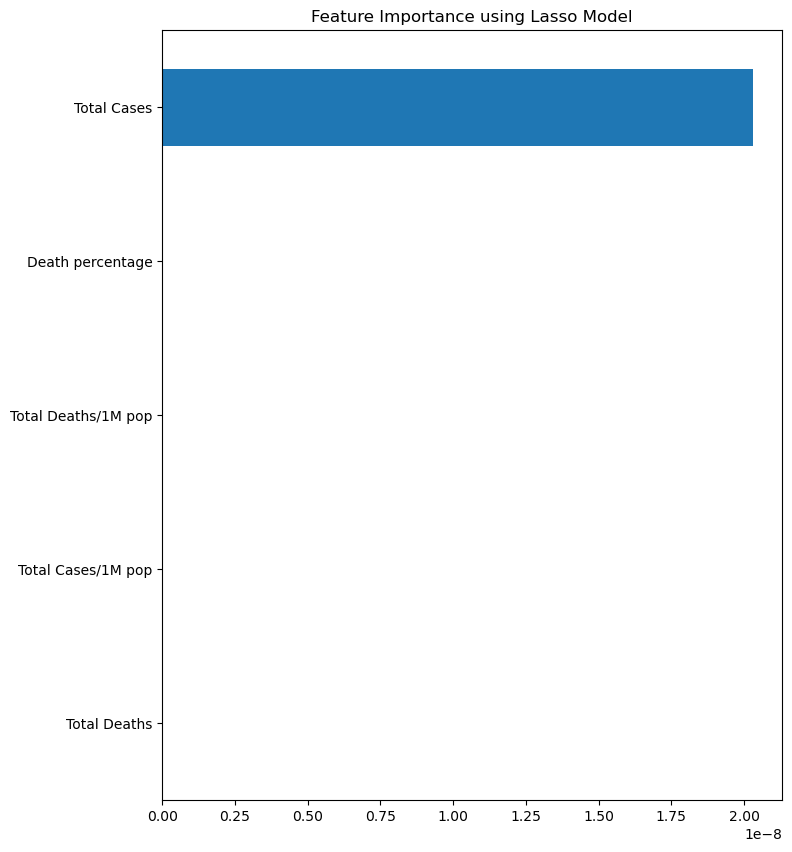

In [24]:
from sklearn.linear_model import LassoCV
#Apply an embedded method by using Lasso Regression. Record the selected features.

# Initialize LassoCV model
reg = LassoCV(cv=5)  # Use 5-fold cross-validation for alpha selection
# Fit Lasso regression model
reg.fit(X, y)
selected_features_lasso = X.columns[reg.coef_ != 0].tolist()
print("Selected Features (Lasso Regression):", selected_features_lasso)

# Print selected alpha and R-squared score
print("Best alpha using built-in LassoCV:", reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))

# Extract coefficients and create a Series
coef = pd.Series(reg.coef_, index=X.columns)

# Print coefficients
print("Coefficients:")
print(coef)

# Print the number of selected and eliminated variables
selected_variables = sum(coef != 0)
eliminated_variables = sum(coef == 0)
print(f"Lasso picked {selected_variables} variables and eliminated {eliminated_variables} variables")

# Visualize feature importance
plt.figure(figsize=(8, 10))
imp_coef = coef.sort_values()
imp_coef.plot(kind="barh")
plt.title("Feature Importance using Lasso Model")
plt.show()

# Exploratory Data Analysis

In [25]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read the dataset into a DataFrame using Pandas
df = pd.read_excel('Coronavirus.xlsx')

# Display data information of the dataset
df.shape

(225, 10)

In [26]:
# Display data information of the row
df.shape[0]

225

In [27]:
# Display data information of the columm
df.shape[1]

10

In [28]:
#Display all the data information at once
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Total Cases/1M pop       225 non-null    int64  
 8   Total Deaths/1M pop      225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [29]:
#Check duplicated data in the dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
220    False
221    False
222    False
223    False
224    False
Length: 225, dtype: bool

In [30]:
df.duplicated().any()

False

In [31]:
df.duplicated().sum()

0

In [32]:
#Caculate statistics of the dataset（standard deviation, minimum value, maximum value, 25%, 50%  and 75% of the values.）
df.describe()

Population   Total Cases  Total Deaths  Total Cases/1M pop  \
count  2.250000e+02  2.250000e+02  2.250000e+02          225.000000   
mean   3.507321e+07  2.184781e+06  2.744813e+04       136900.373333   
std    1.392418e+08  7.275938e+06  9.689177e+04       145060.340289   
min    8.050000e+02  1.000000e+00  0.000000e+00            9.000000   
25%    5.665570e+05  2.407100e+04  1.890000e+02        11384.000000   
50%    5.827911e+06  1.639360e+05  1.965000e+03        88987.000000   
75%    2.190585e+07  1.092547e+06  1.366000e+04       223335.000000   
max    1.439324e+09  8.183905e+07  1.008222e+06       696044.000000   

       Total Deaths/1M pop  Death percentage  
count           225.000000        225.000000  
mean           1096.715556          1.444125  
std            1195.715543          1.741728  
min               0.000000          0.000000  
25%             123.000000          0.511291  
50%             708.000000          1.036905  
75%            1795.000000          1.977017  
max            6286.000000         18.151787

In [33]:
#Calculate the mean value for all the numeric values

mean_values = df.mean()
# Convert the mean values to integers

mean_values = mean_values.astype(str)

# Print the mean values
mean_values

C:\Users\User\AppData\Local\Temp\ipykernel_22120\805008753.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()


Population             35073207.435555555
Total Cases             2184781.453333333
Total Deaths            27448.12888888889
Total Cases/1M pop     136900.37333333332
Total Deaths/1M pop    1096.7155555555555
Death percentage       1.4441248952577774
dtype: object

In [34]:
#Calculate the median value for all the numeric values

median_values = df.median()

# Convert the median values to integers
median_values = median_values.astype(int)

# Print the median values
print(median_values)

Population             5827911
Total Cases             163936
Total Deaths              1965
Total Cases/1M pop       88987
Total Deaths/1M pop        708
Death percentage             1
dtype: int32


C:\Users\User\AppData\Local\Temp\ipykernel_22120\3154040216.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()


In [35]:
#Calculate the minimum and maximum values for total cases.
df.agg({"Total Cases": ['min','max']})

Total Cases
min            1
max     81839052

In [36]:
#Calculate the sum values for total cases.
df.agg({"Total Cases": ['sum']})

Total Cases
sum    491575827

In [37]:
#Calculate the minimum and maximum values for total cases based on continent.
df.groupby("Continent").agg({"Total Cases": ['min','max']})

Total Cases          
                                        min       max
Continent                                            
Africa                                    2   3722954
Asia                                     82  43029044
Europe                                   29  25997852
Latin America and the Caribbean         123  29999816
Northern America                       1957  81839052
Oceania                                   1   4680816

In [38]:
#Calculate the sum values for total cases based on continent.
df.groupby("Continent").agg({"Total Cases": ['mean']})

Total Cases
                                         mean
Continent                                    
Africa                           2.028312e+05
Asia                             2.876677e+06
Europe                           3.756927e+06
Latin America and the Caribbean  1.406442e+06
Northern America                 1.707295e+07
Oceania                          3.322328e+05

In [39]:
#Calculate the range for death percentage.
df.agg({"Death percentage": ['min','max']})

Death percentage
min          0.000000
max         18.151787

array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Total Cases'}>],
       [<Axes: title={'center': 'Total Deaths'}>,
        <Axes: title={'center': 'Total\xa0Cases/1M pop'}>],
       [<Axes: title={'center': 'Total\xa0Deaths/1M pop'}>,
        <Axes: title={'center': 'Death percentage'}>]], dtype=object)

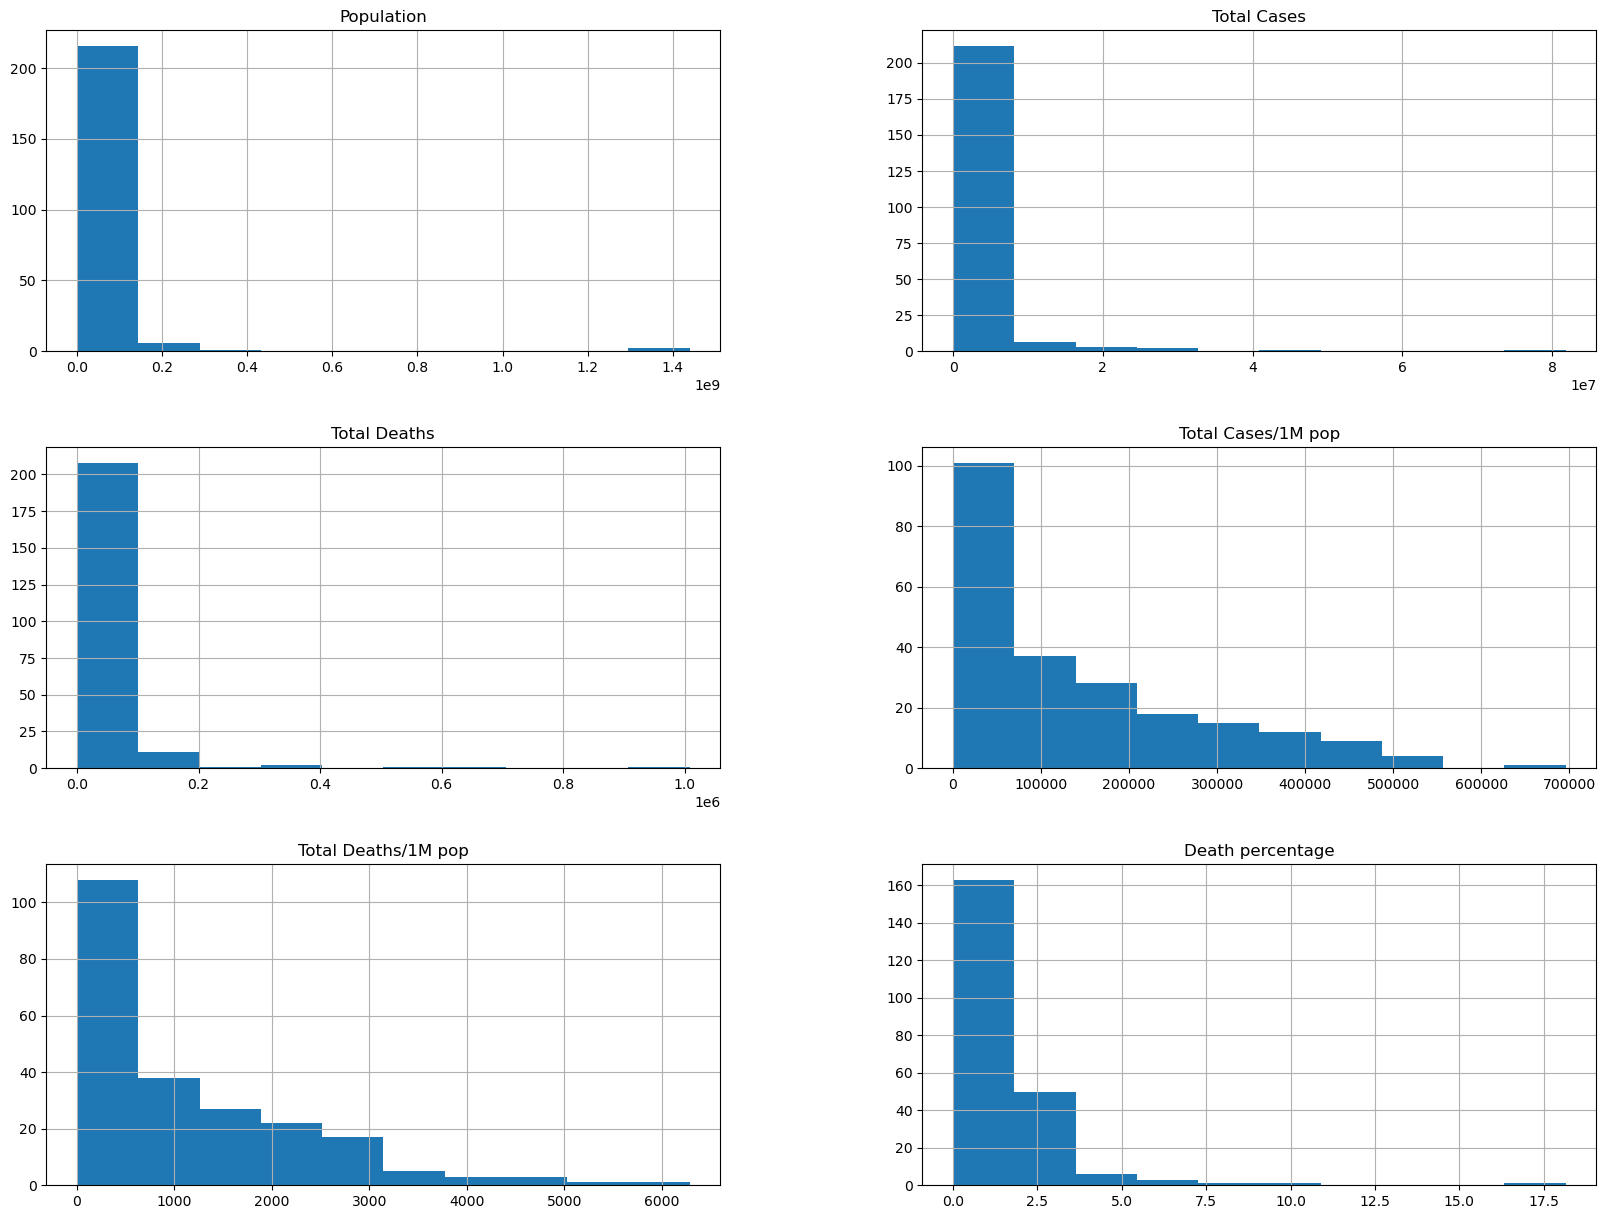

In [40]:
#Histogram for all the numeric values.
df.hist(figsize = (20,15)) 

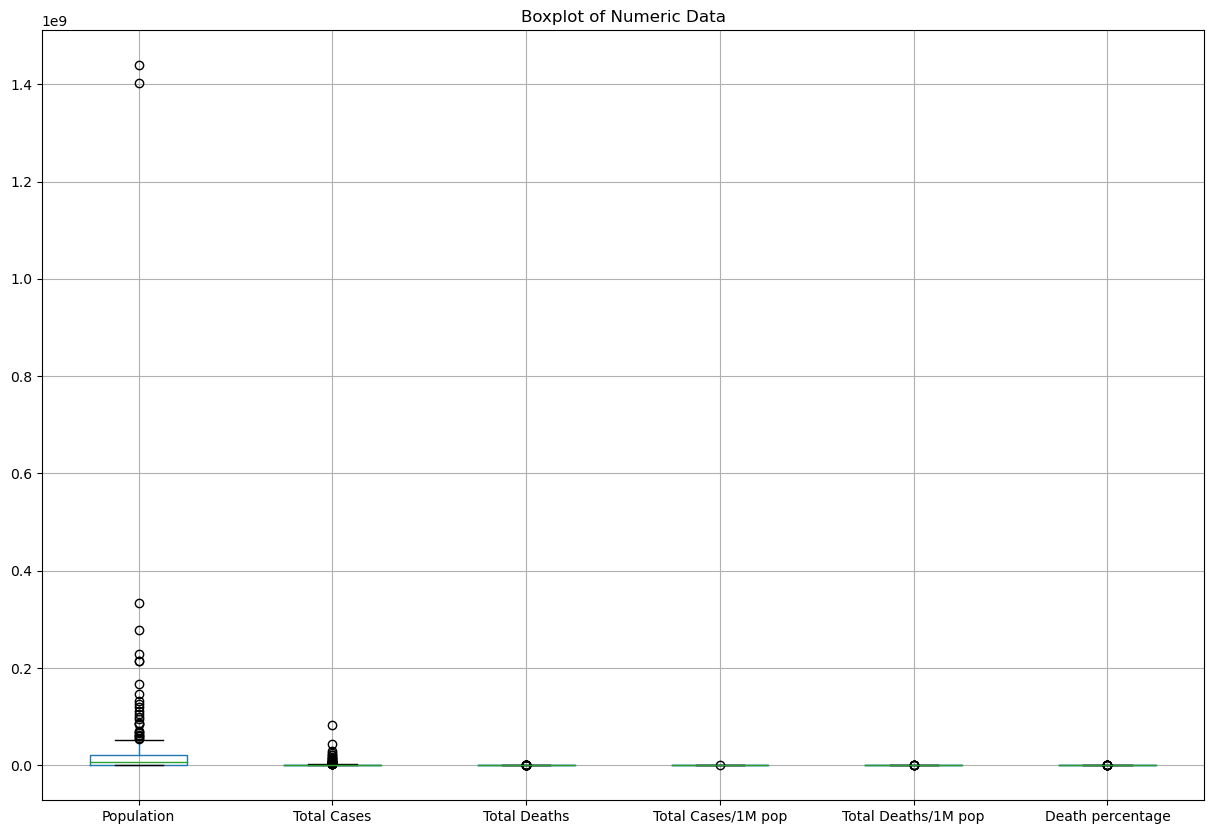

In [41]:
#Create boxplots for all the numeric values
plt.figure(figsize=(15, 10)) 
df.boxplot()
# Set a title if desired
plt.title('Boxplot of Numeric Data')
# Show the plot
plt.show()

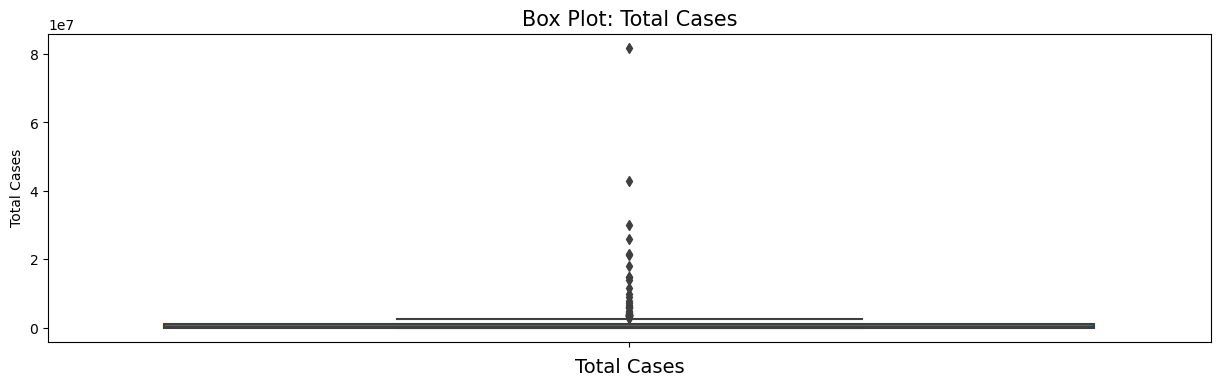

In [42]:
#Create boxplots for total cases values. For the above boxplot, we cannot ensure the outliers, but after one-by-one show, it can show very clearly.
plt.figure(figsize=(15,4))
sns.boxplot(data=df, y="Total Cases")
plt.title('Box Plot: Total Cases', fontsize=15)
plt.xlabel('Total Cases', fontsize=14)

plt.show()


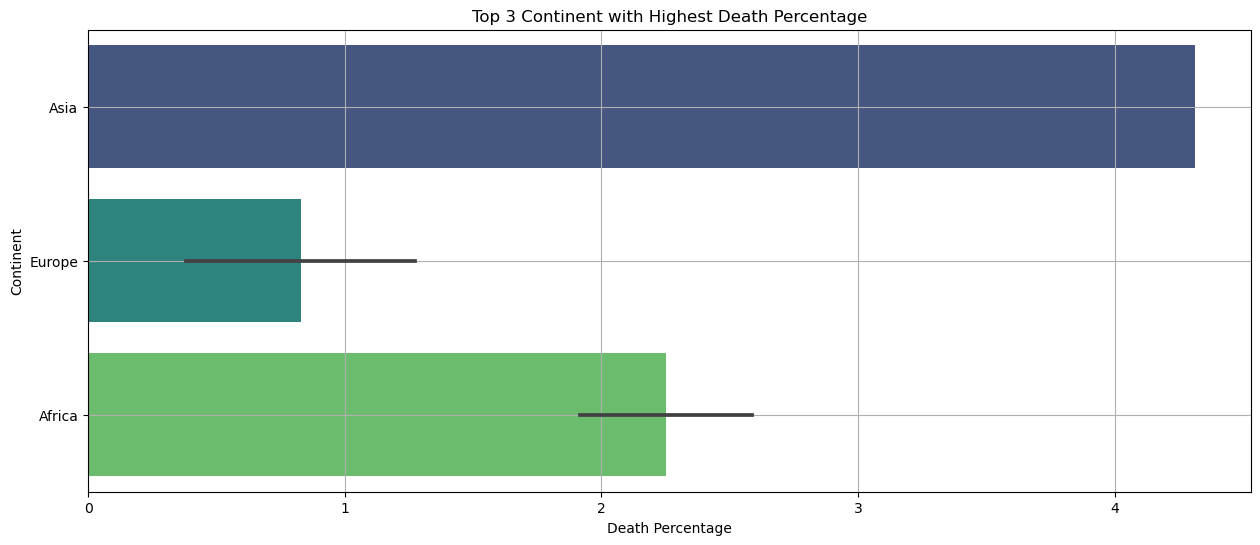

In [43]:
#Create a bar chart for the top 5 Country with highest Death Percentage. In this bar chart, Yemen is highest Death Percentage Country. 

plt.figure(figsize=(15, 6))
sns.barplot(x='Death percentage', y='Continent', data=df.head(5), palette='viridis')
plt.xlabel('Death Percentage')
plt.ylabel('Continent')
plt.title('Top 3 Continent with Highest Death Percentage')
plt.grid(True)
plt.show()


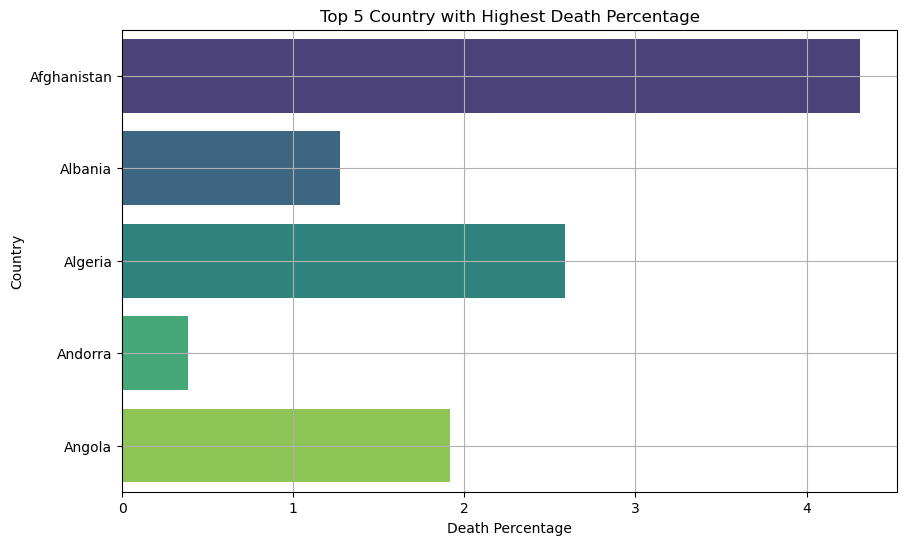

In [44]:
#Create a scatter plot that visualizes the relationship between population and total deaths. 
plt.figure(figsize=(10, 6))
sns.barplot(x='Death percentage', y='Country', data=df.head(5), palette='viridis')
plt.xlabel('Death Percentage')
plt.ylabel('Country')
plt.title('Top 5 Country with Highest Death Percentage')
plt.grid(True)
plt.show()


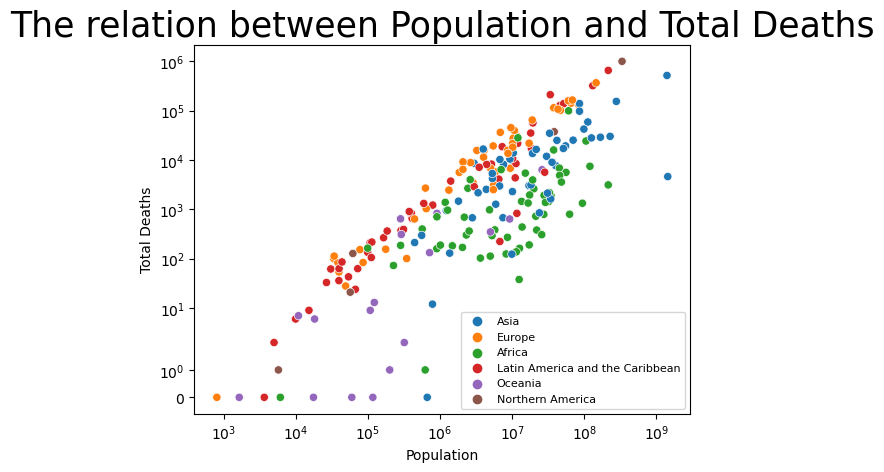

In [45]:
# Create a scatter plot that visualizes the relationship between population and total deaths. 

sns.scatterplot(y='Total Deaths', x='Population', data=df, hue='Continent')
plt.legend(loc='lower right',fontsize=8)
plt.title('The relation between Population and Total Deaths', size='25')
plt.xscale('symlog')
plt.yscale('symlog')
plt.show()


# Data Visualisation

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium #pip install folium
import pandas as pd

df = pd.read_excel('Coronavirus.xlsx')
df

Country                Other names ISO 3166-1 alpha-3 CODE  \
0          Afghanistan                Afghanistan                     AFG   
1              Albania                    Albania                     ALB   
2              Algeria                    Algeria                     DZA   
3              Andorra                    Andorra                     AND   
4               Angola                     Angola                     AGO   
..                 ...                        ...                     ...   
220  Wallis and Futuna  Wallis and Futuna Islands                     WLF   
221     Western Sahara             Western Sahara                 ESHÃ‚Â    
222              Yemen                      Yemen                     YEM   
223             Zambia                     Zambia                     ZMB   
224           Zimbabwe                   Zimbabwe                     ZWE   

     Population Continent  Total Cases  Total Deaths  Total Cases/1M pop  \
0      40462186      Asia       177827          7671                4395   
1       2872296    Europe       273870          3492               95349   
2      45236699    Africa       265691          6874                5873   
3         77481    Europe        40024           153              516565   
4      34654212    Africa        99194          1900                2862   
..          ...       ...          ...           ...                 ...   
220       10894   Oceania          454             7               41674   
221      623031    Africa           10             1                  16   
222    30975258      Asia        11806          2143                 381   
223    19284482    Africa       317076          3967               16442   
224    15241601    Africa       246525          5446               16174   

     Total Deaths/1M pop  Death percentage  
0                    190          4.313743  
1                   1216          1.275058  
2                    152          2.587216  
3                   1975          0.382271  
4                     55          1.915438  
..                   ...               ...  
220                  643          1.541850  
221                    2         10.000000  
222                   69         18.151787  
223                  206          1.251120  
224                  357          2.209107  

[225 rows x 10 columns]

In [47]:
df.isnull().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Total Cases/1M pop         0
Total Deaths/1M pop        0
Death percentage           0
dtype: int64

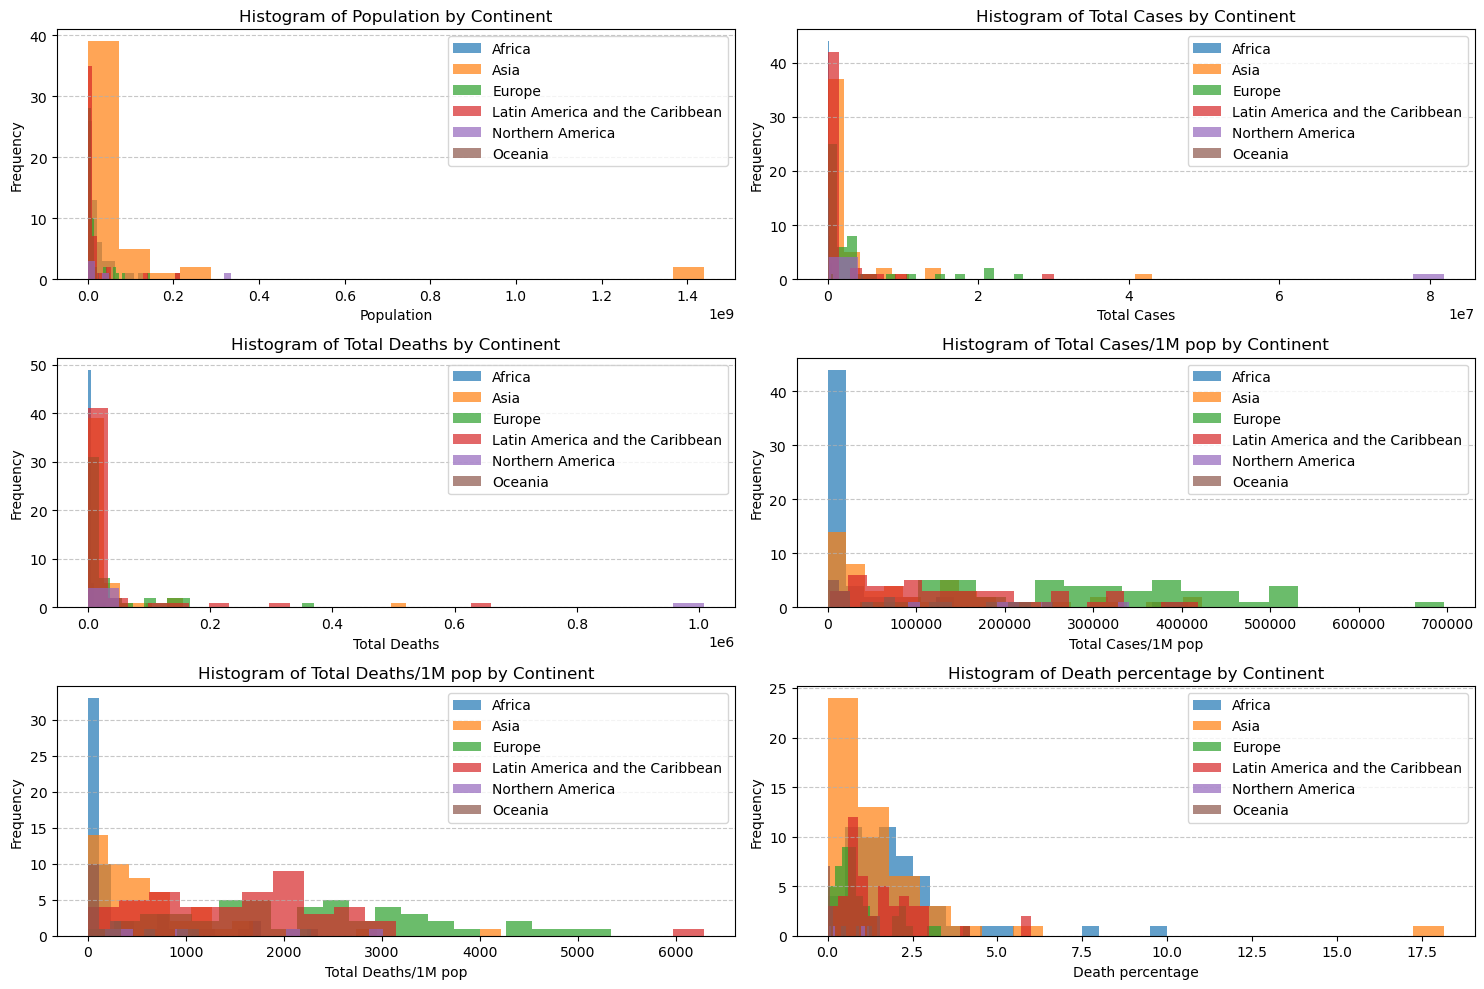

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define num_rows and num_cols
num_rows = 3
num_cols = 2

# Group the data by 'continent'
grouped = df.groupby('Continent')

# Get a list of numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Define the number of bins for histograms
num_bins = 20

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each numeric column and create a histogram for each continent
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    
    # Loop through each continent group
    for continent, group_data in grouped:
        ax.hist(group_data[column], bins=num_bins, alpha=0.7, label=continent)
    
    ax.set_title(f'Histogram of {column} by Continent')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any extra empty subplots
for i in range(len(numeric_columns), num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

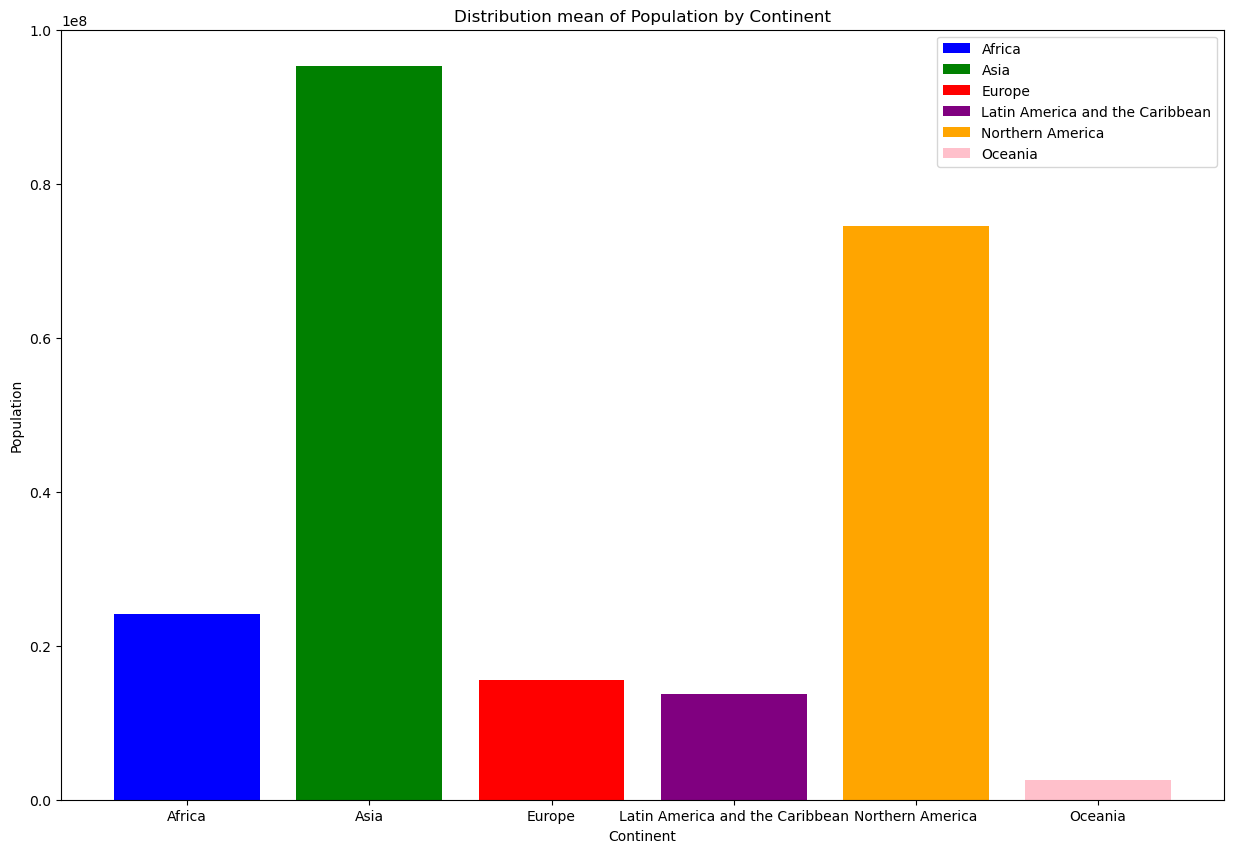

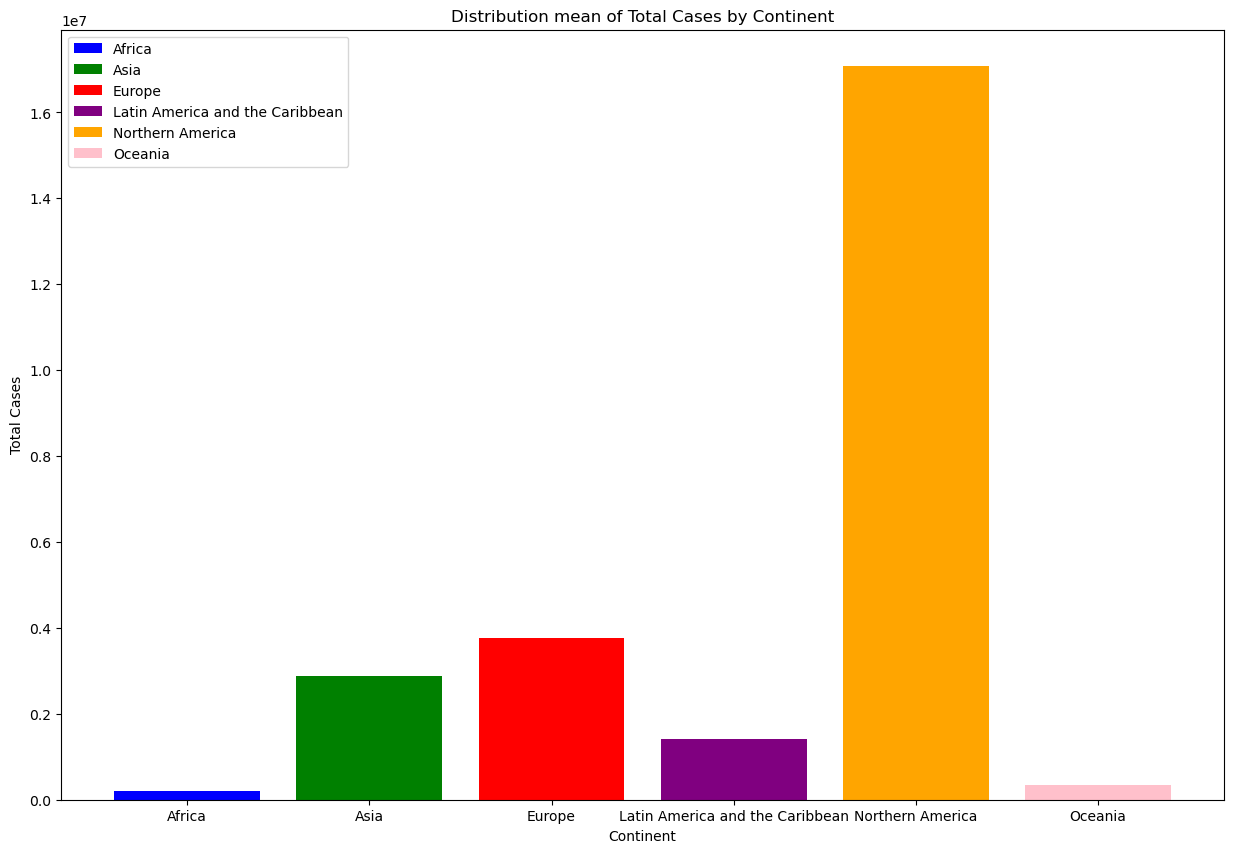

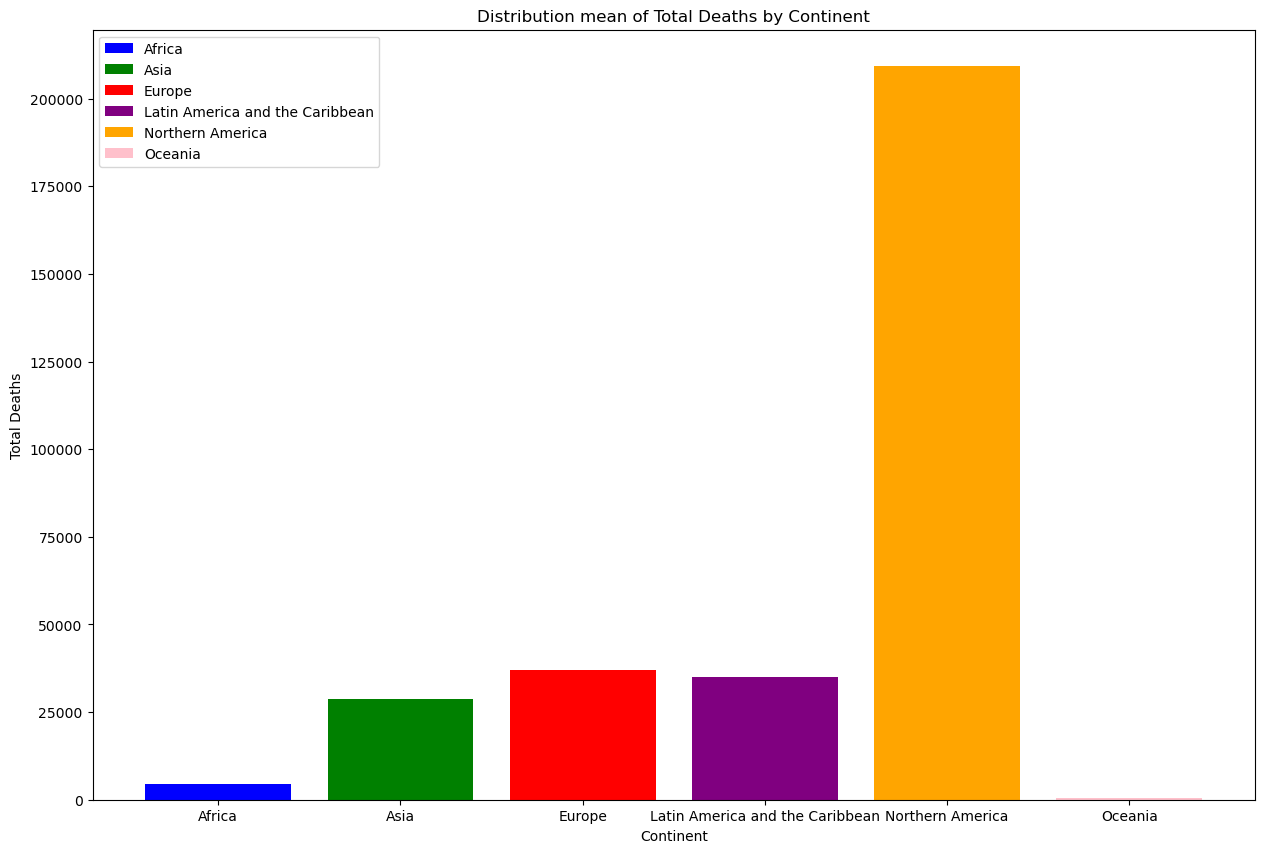

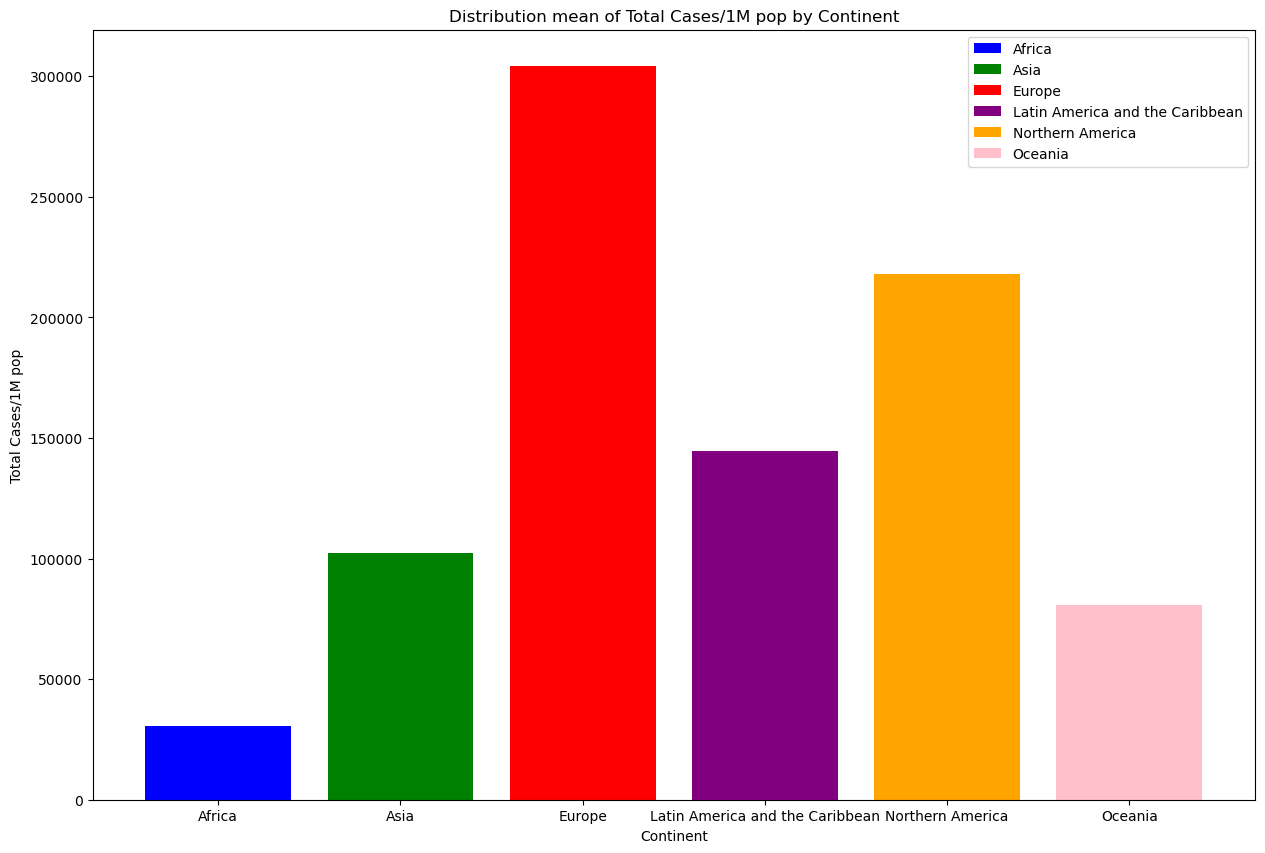

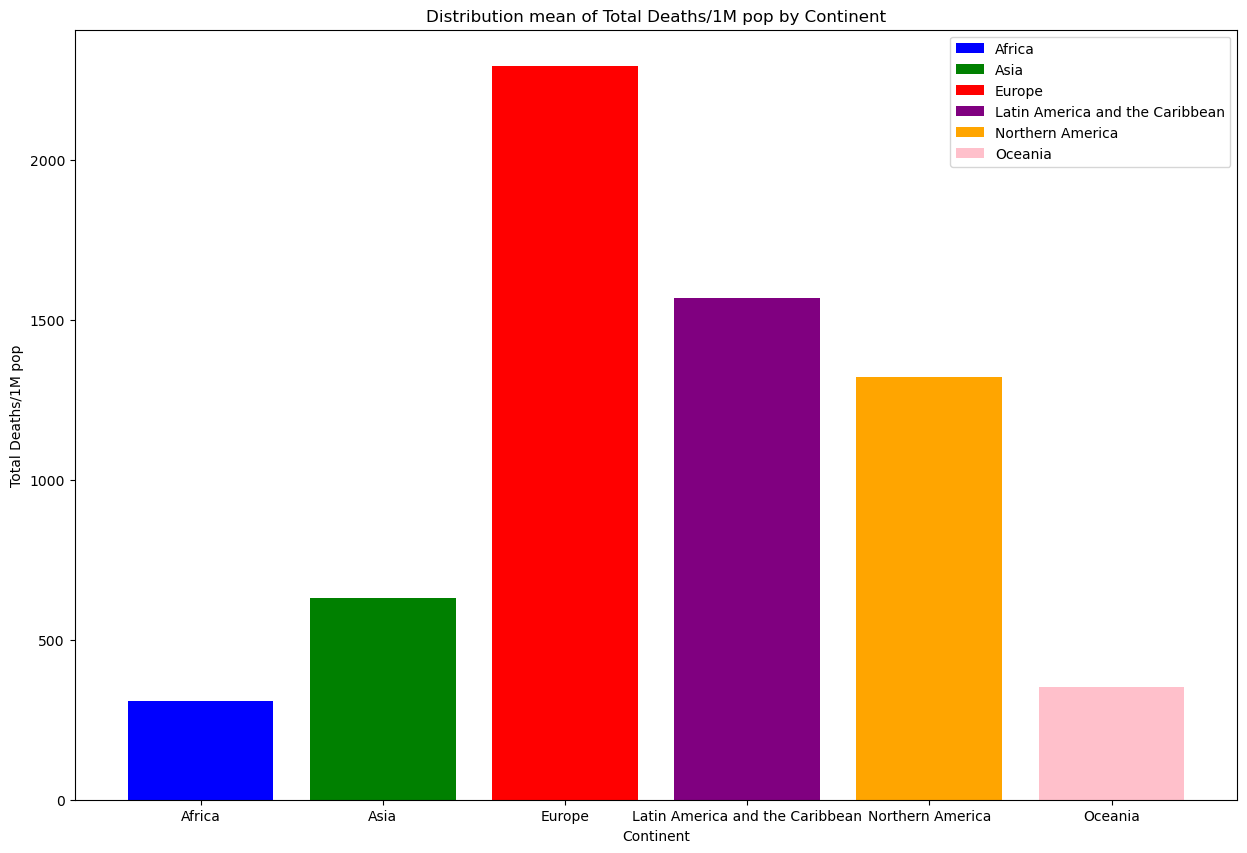

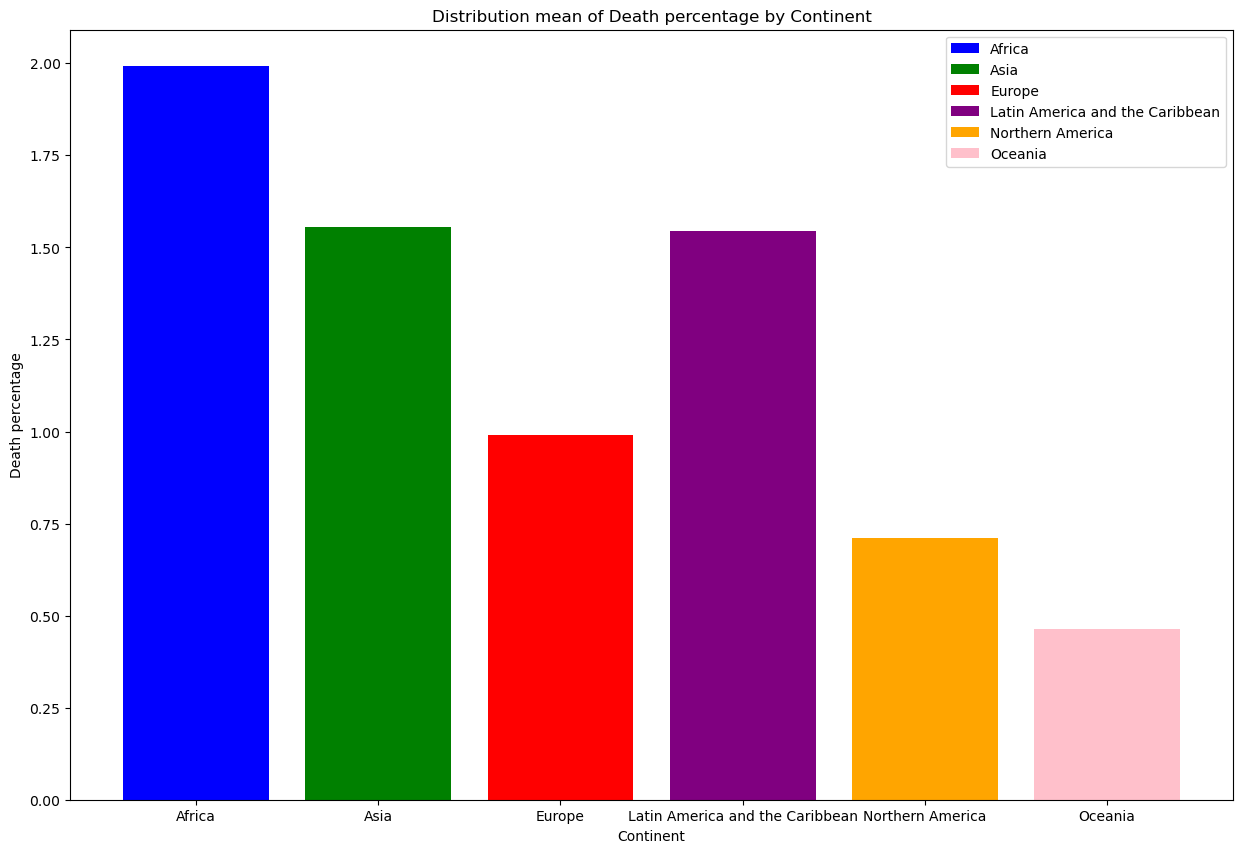

In [49]:

import seaborn as sns

# Group the data by 'Continent'
grouped = df.groupby('Continent')

# Define a list of colors for each continent
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']  # Add more colors if needed

# Get a list of numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Loop through each numeric column
for numeric_column in numeric_columns:
    plt.figure(figsize=(15, 10))

    # Initialize lists to hold data for plotting
    continent_labels = []
    numeric_values = []

    # Collect data for plotting
    for i, (continent, group_data) in enumerate(grouped):
        color = colors[i % len(colors)]  # Cycle through colors if there are more continents than colors
        continent_labels.append(continent)
        numeric_values.append(group_data[numeric_column].mean())  # Calculate mean for each continent

    # Create a grouped bar chart
    bars = plt.bar(continent_labels, numeric_values, color=colors[:len(continent_labels)])

    # Add title and labels
    plt.title(f'Distribution mean of {numeric_column} by Continent')
    plt.xlabel('Continent')
    plt.ylabel(numeric_column)

    # Add legend
    plt.legend(bars, continent_labels)

    # Show the plot
    plt.show()


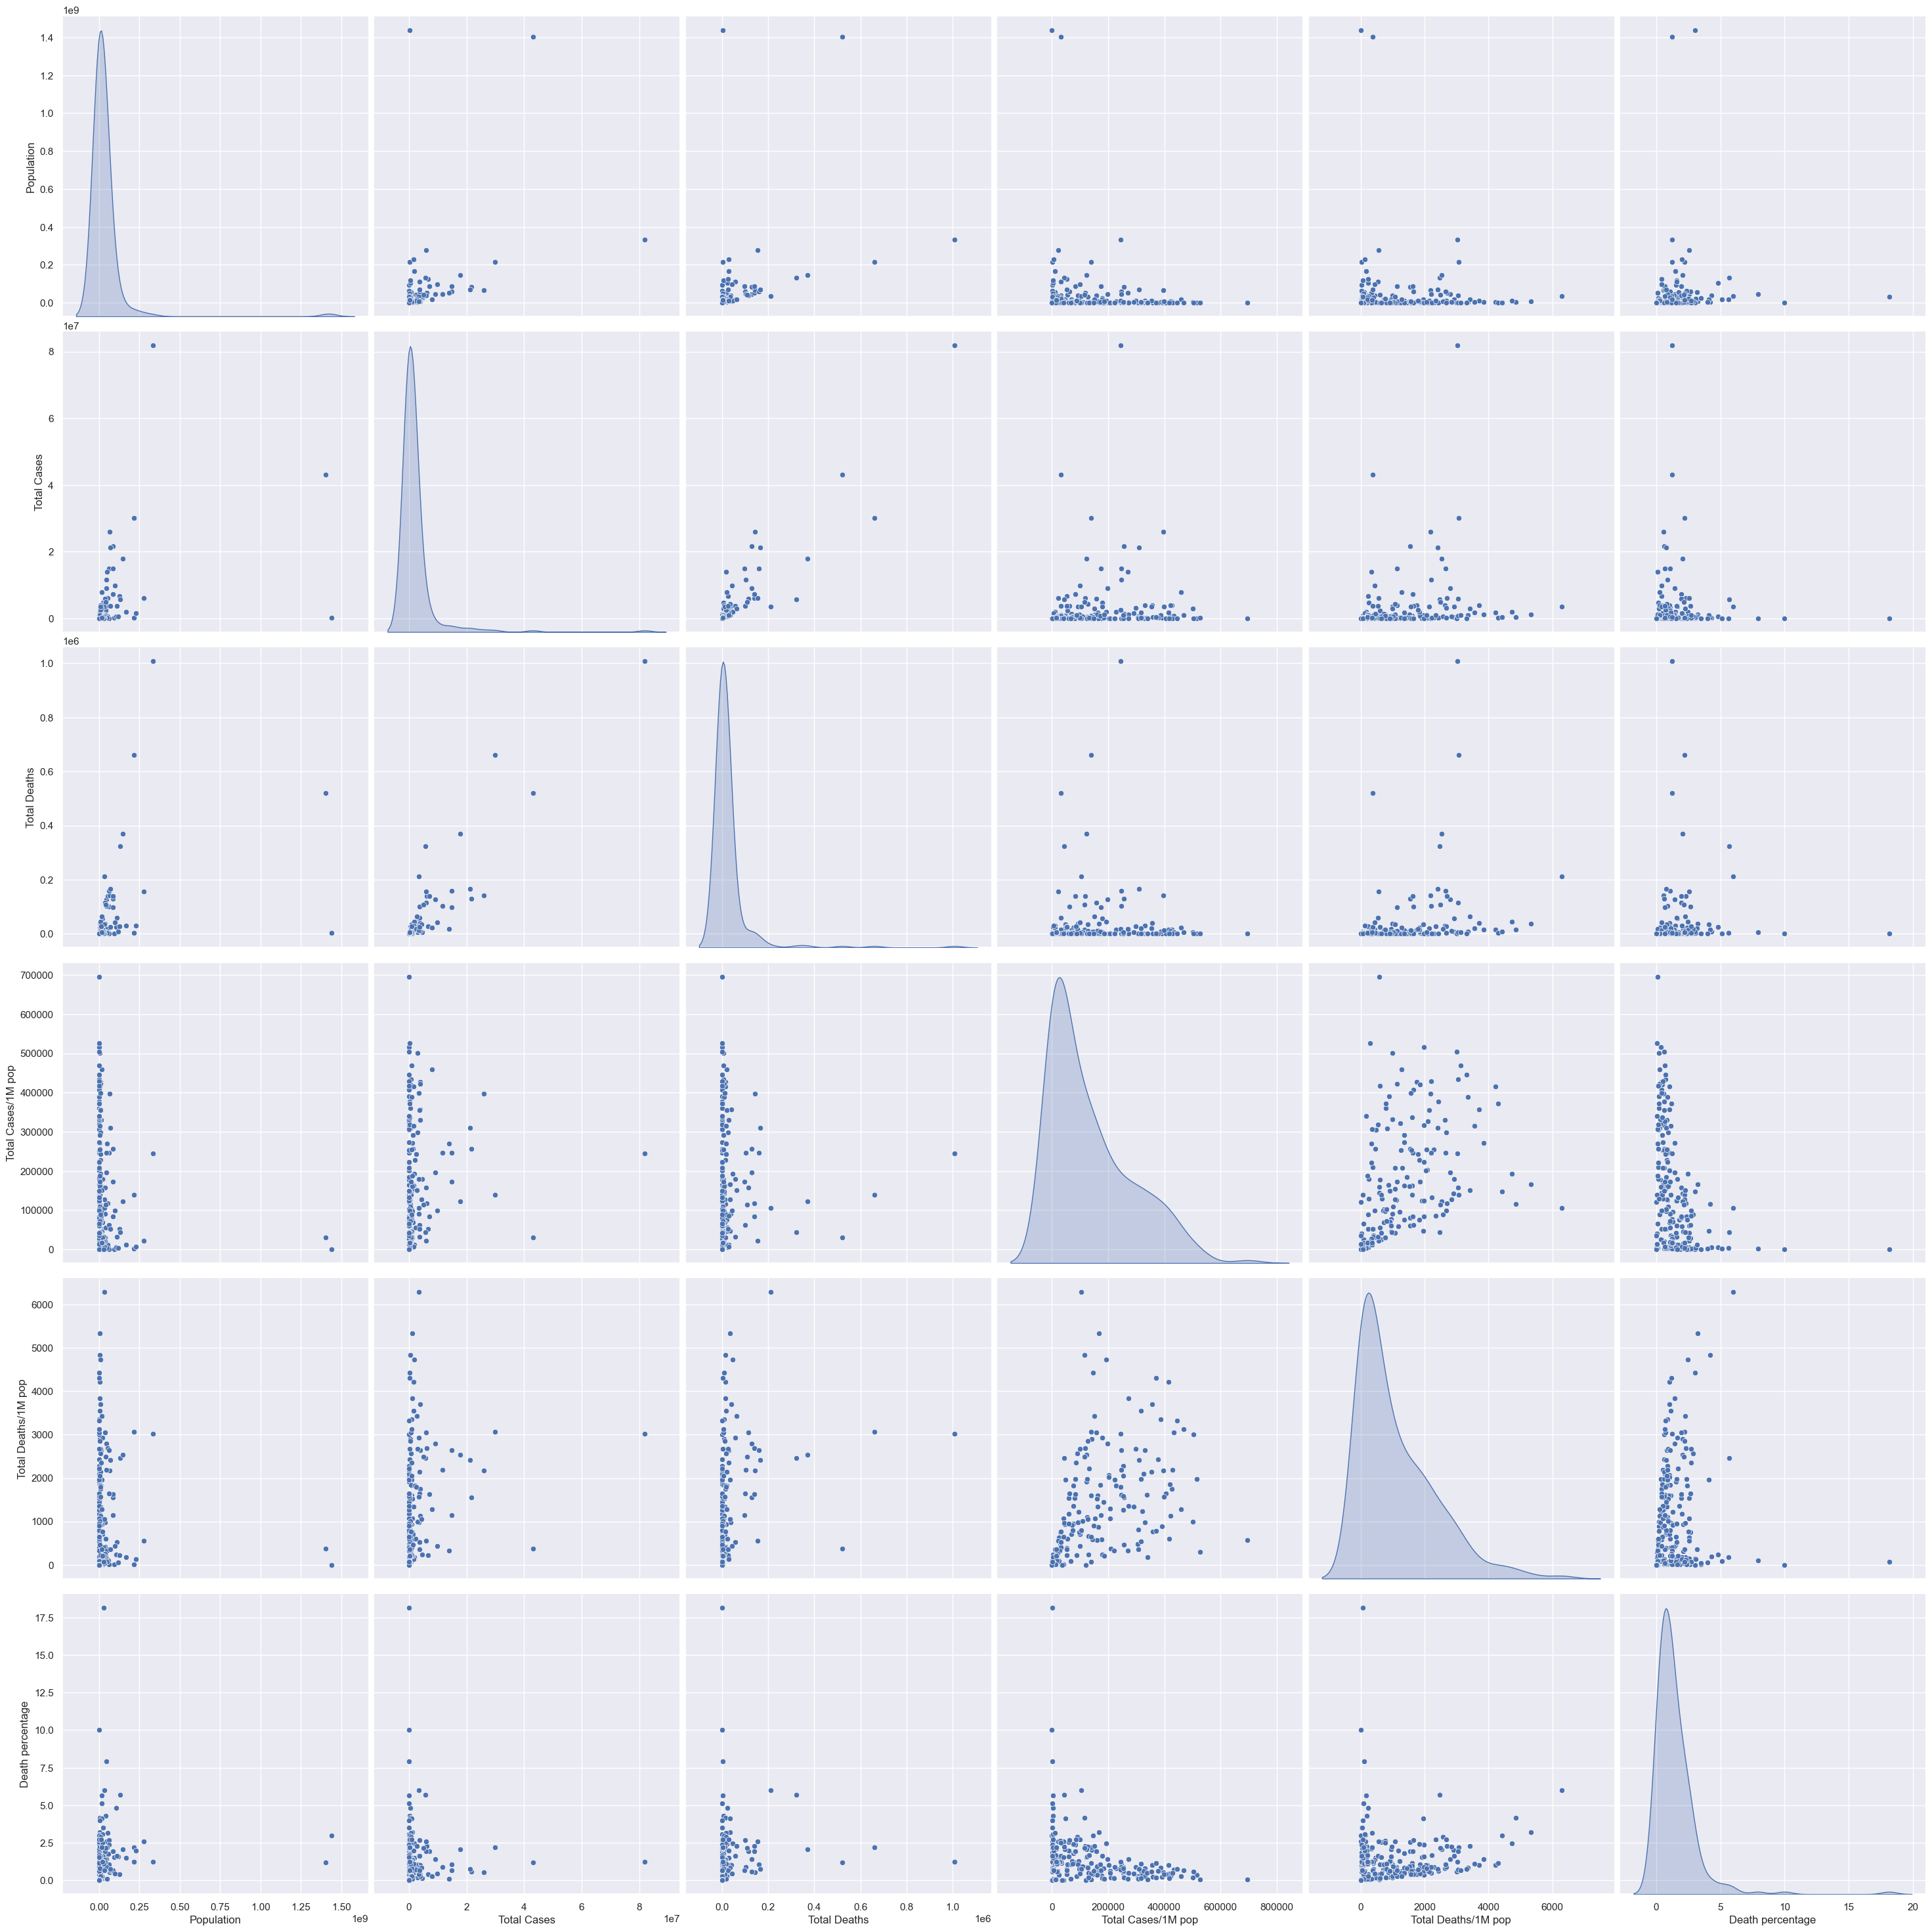

In [50]:
df.columns
columns=['Population', 'Total Cases', 'Total Deaths','Total Cases/1M pop','Total Deaths/1M pop','Death percentage']
sns.set()
sns.pairplot(df[df.columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()
#From the graphs presented, it can be concluded that in most countries the situation was very similar.

C:\Users\User\AppData\Local\Temp\ipykernel_22120\1307451464.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


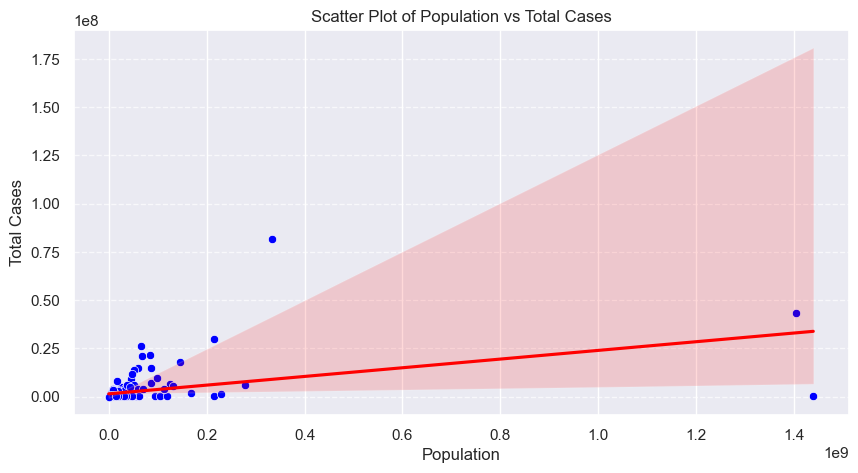

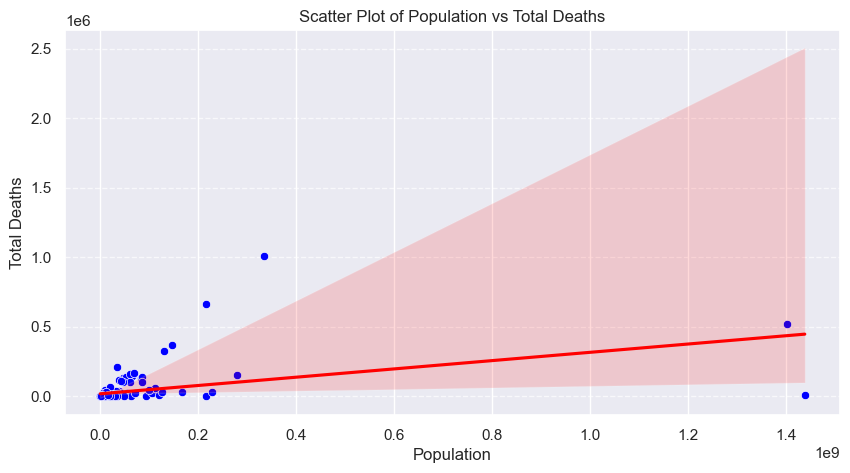

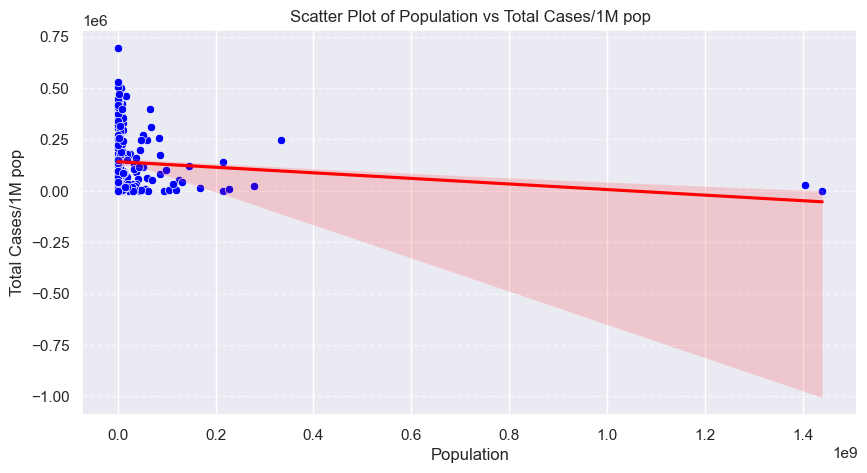

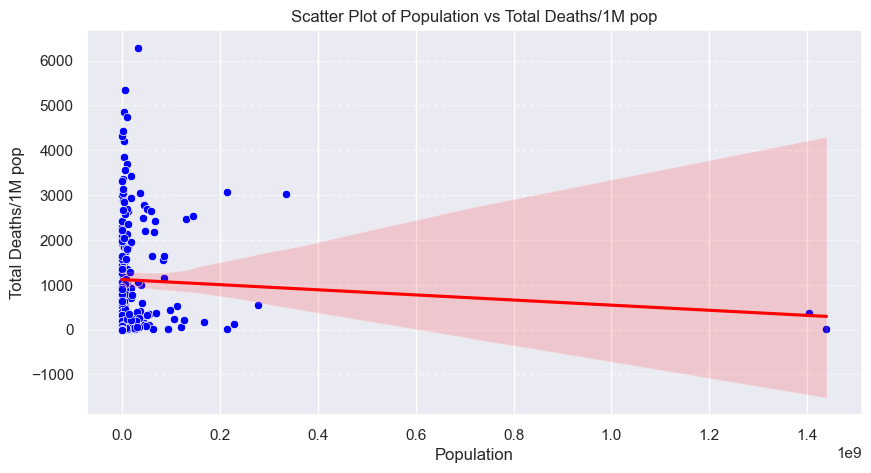

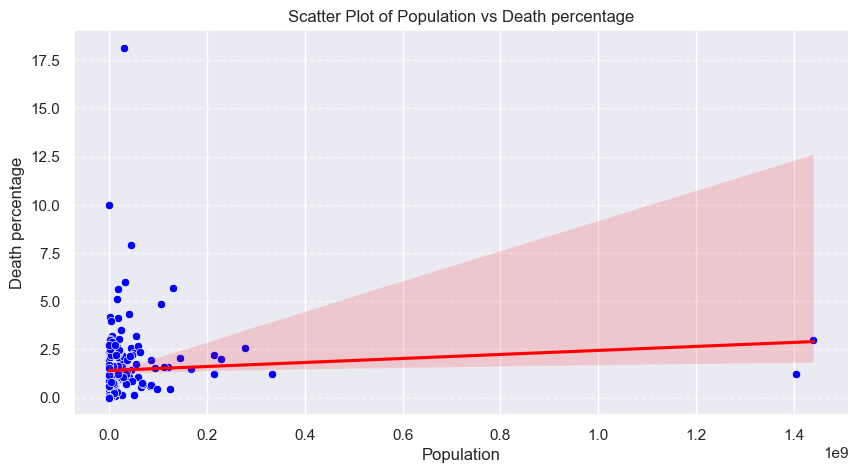

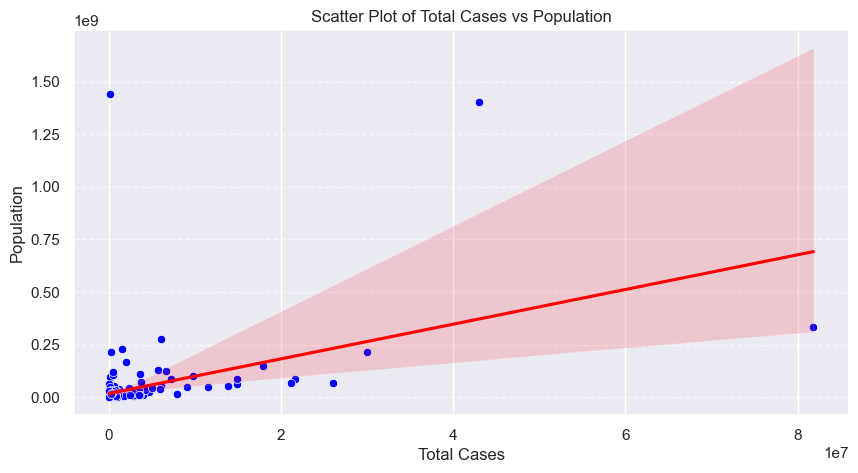

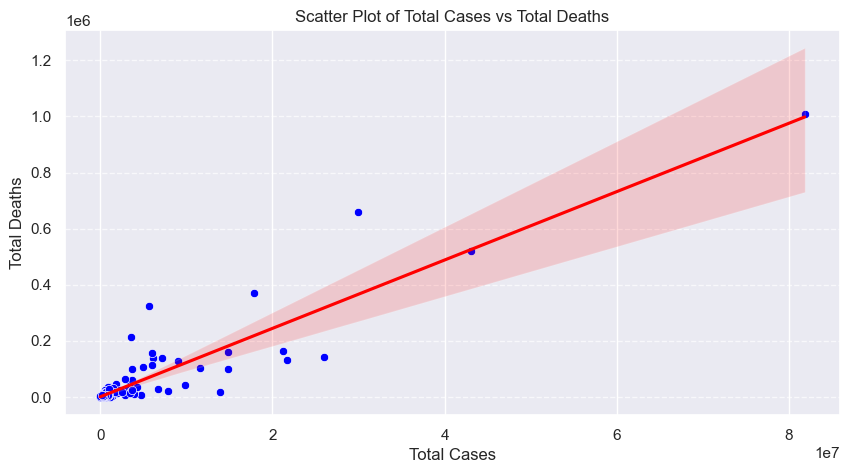

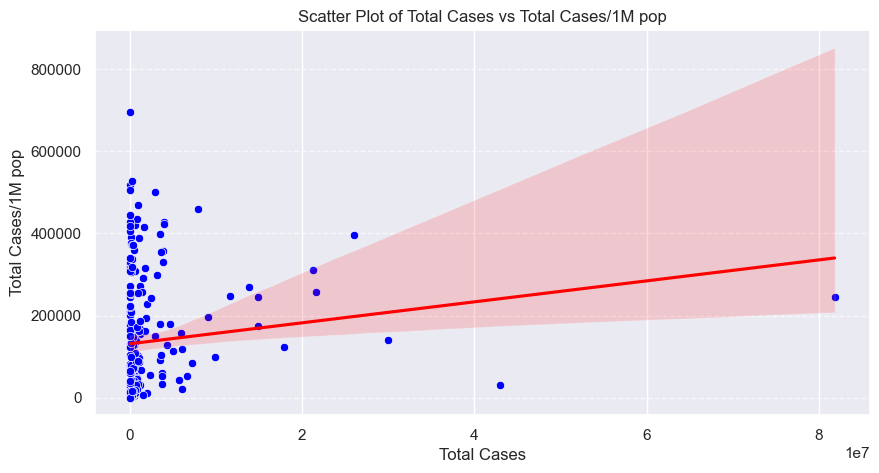

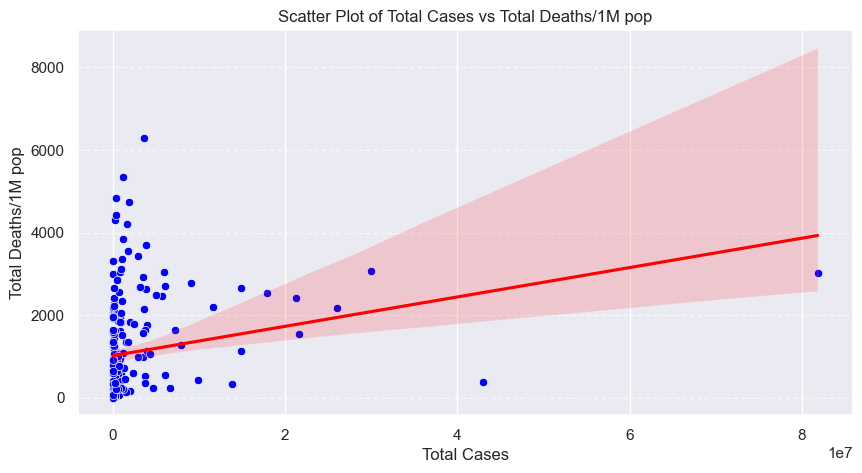

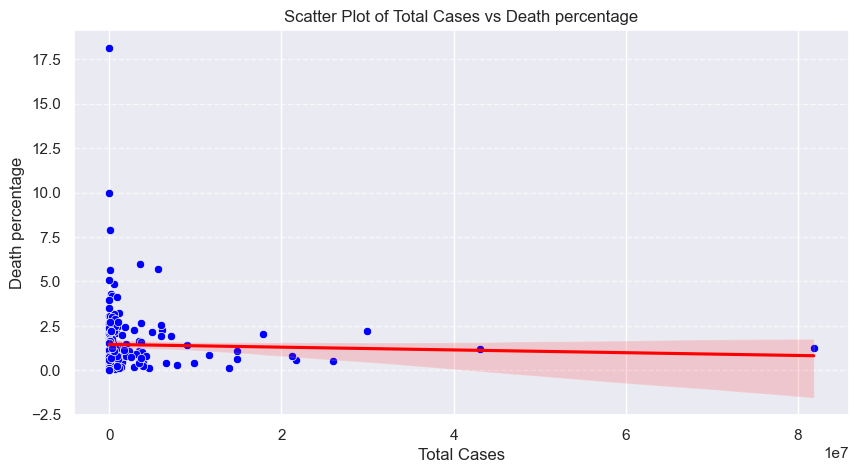

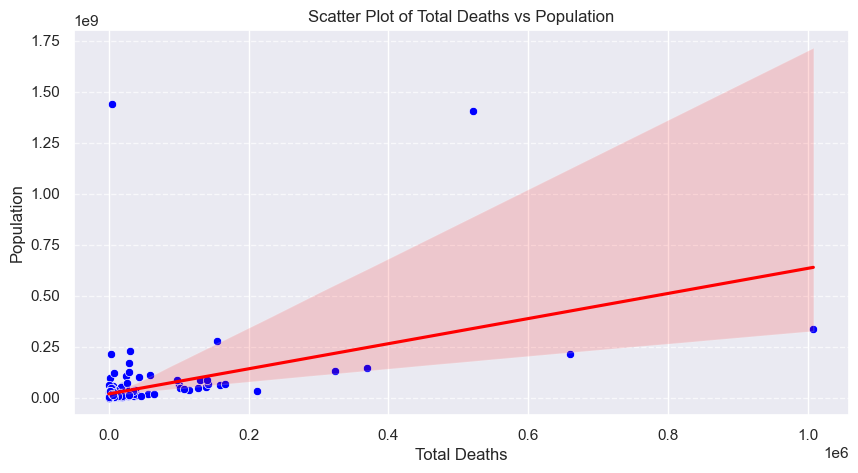

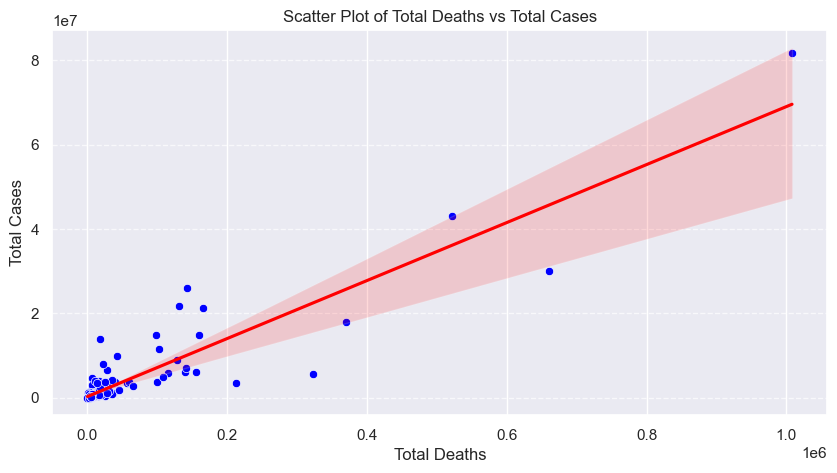

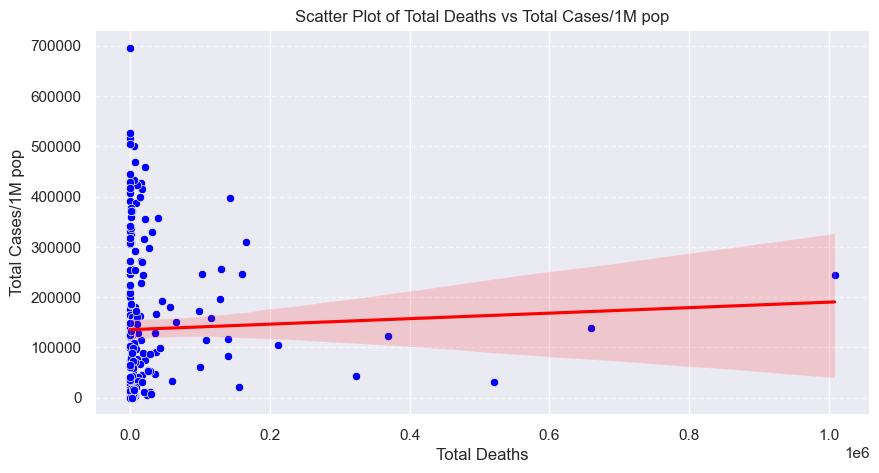

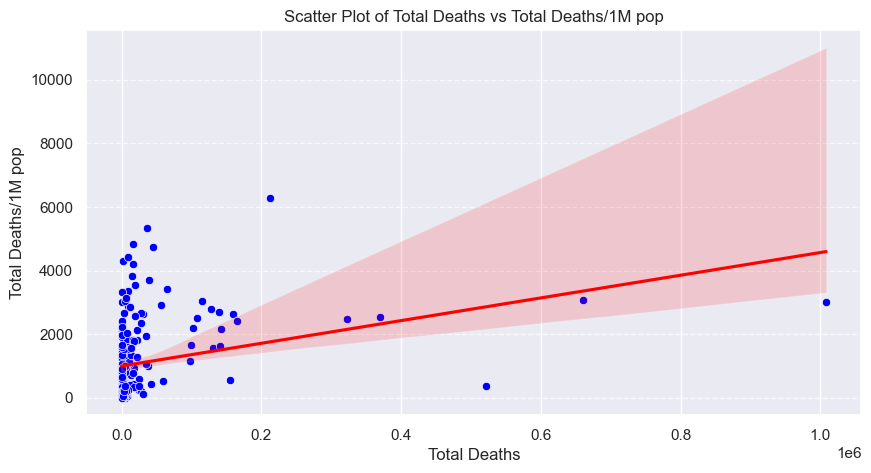

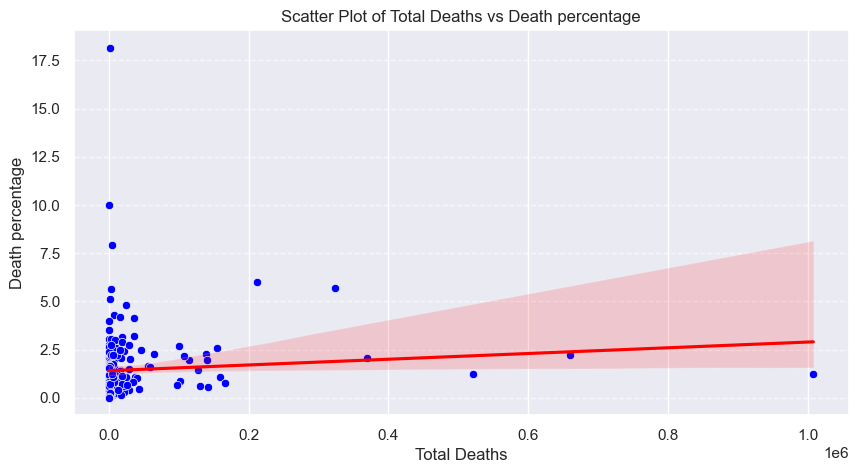

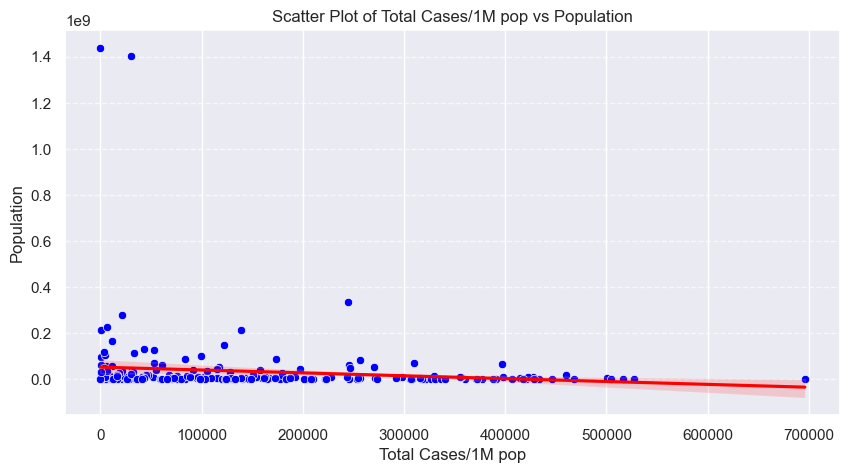

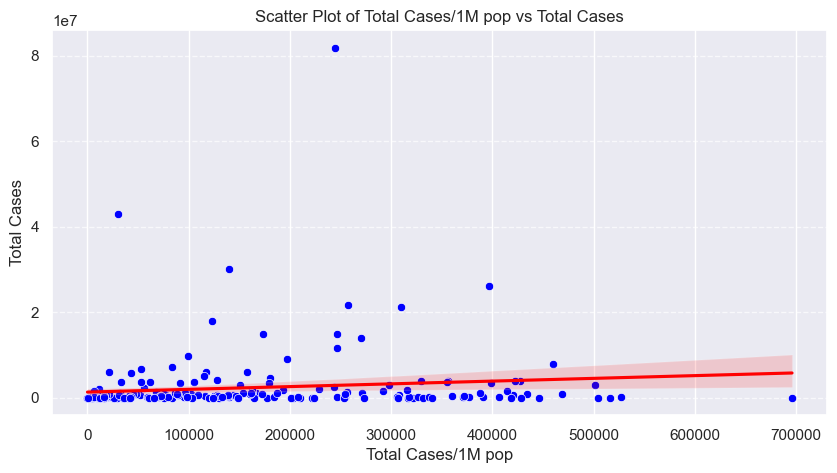

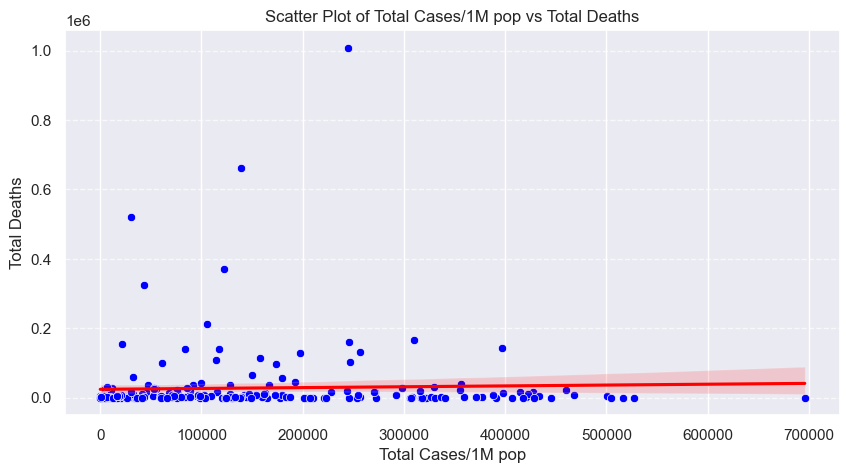

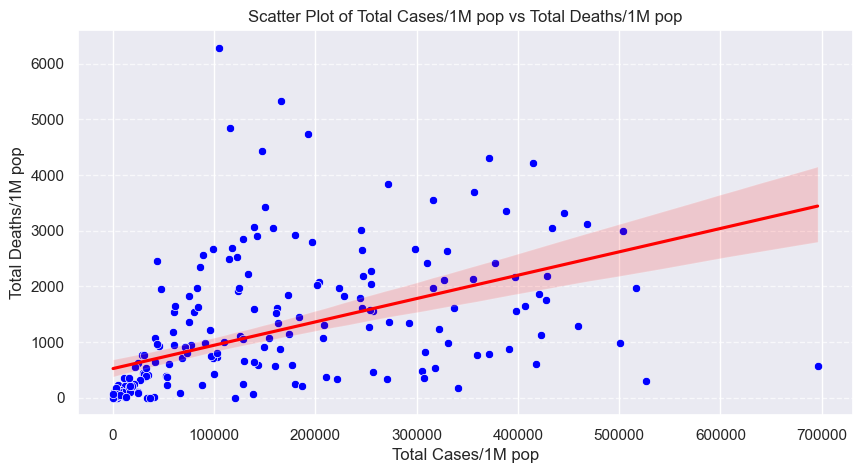

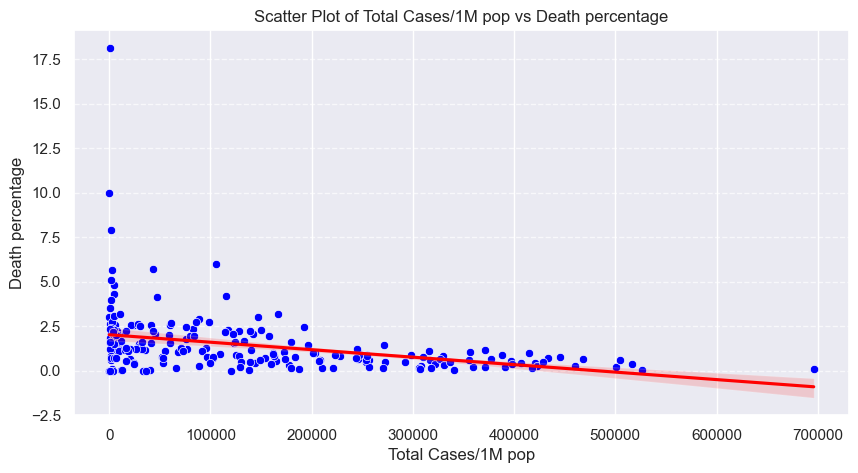

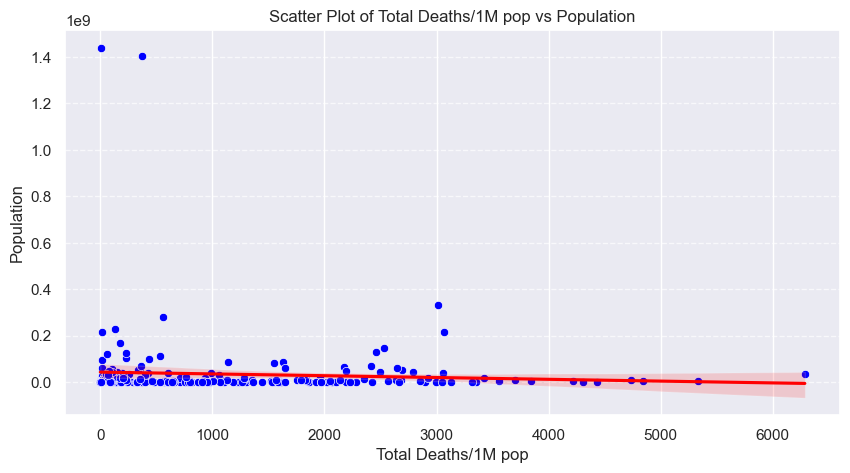

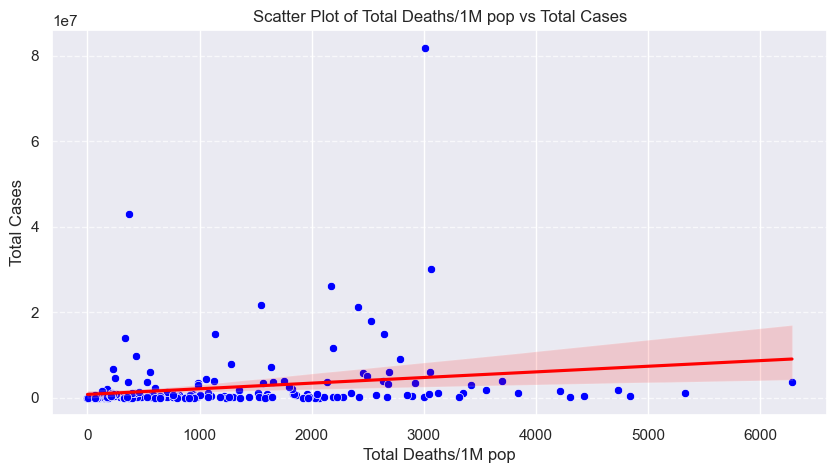

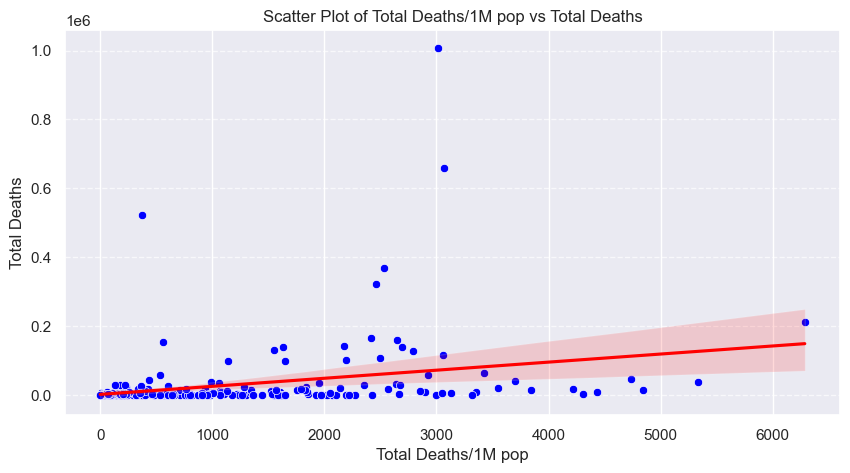

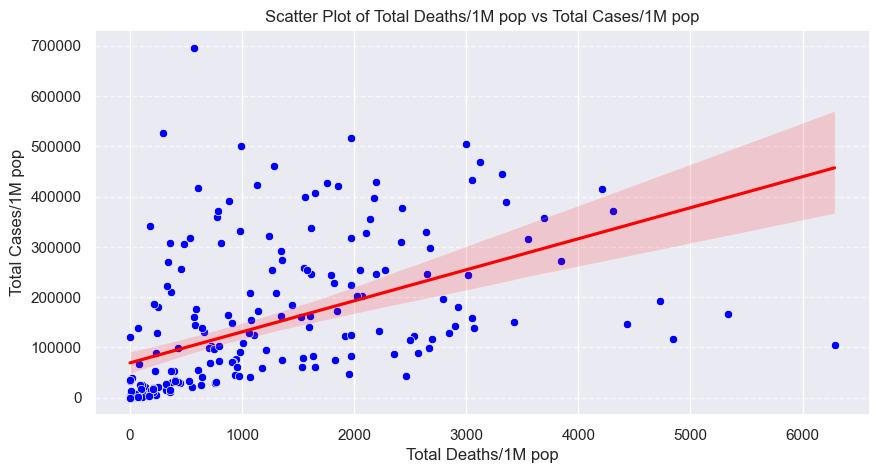

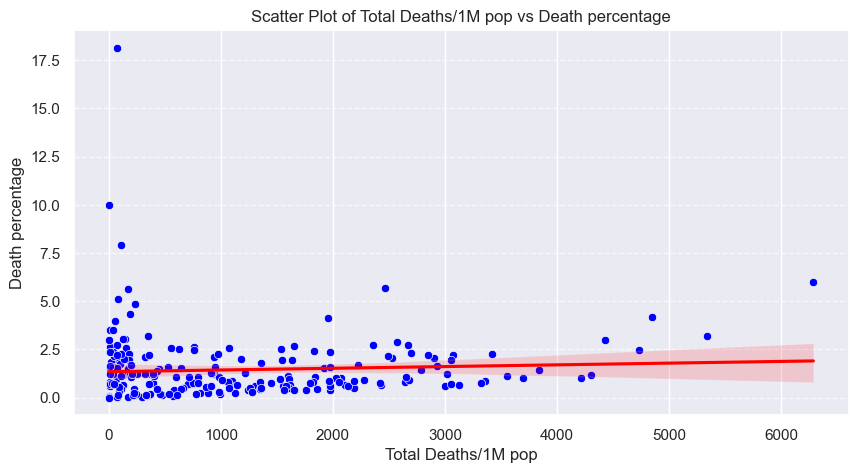

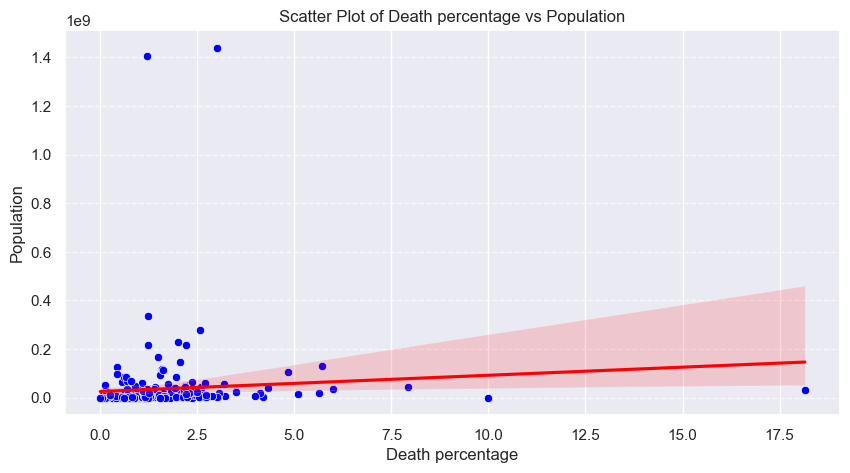

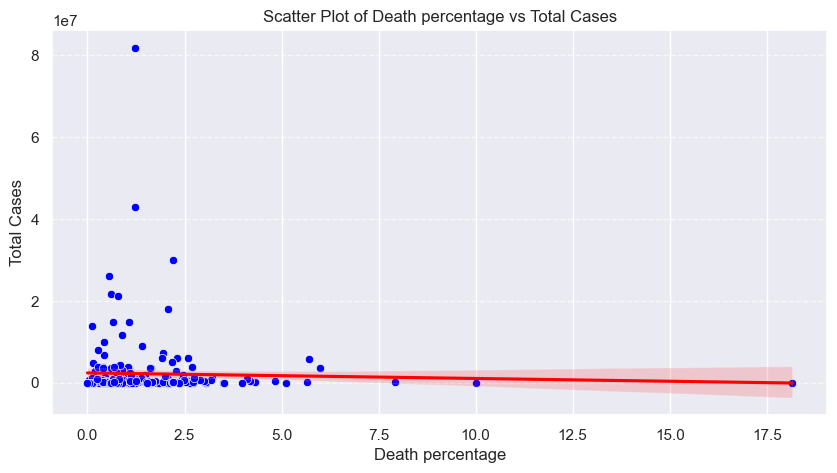

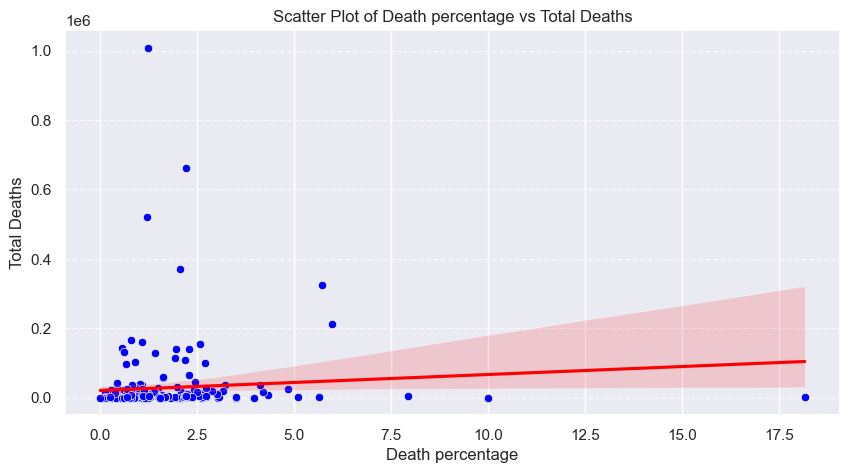

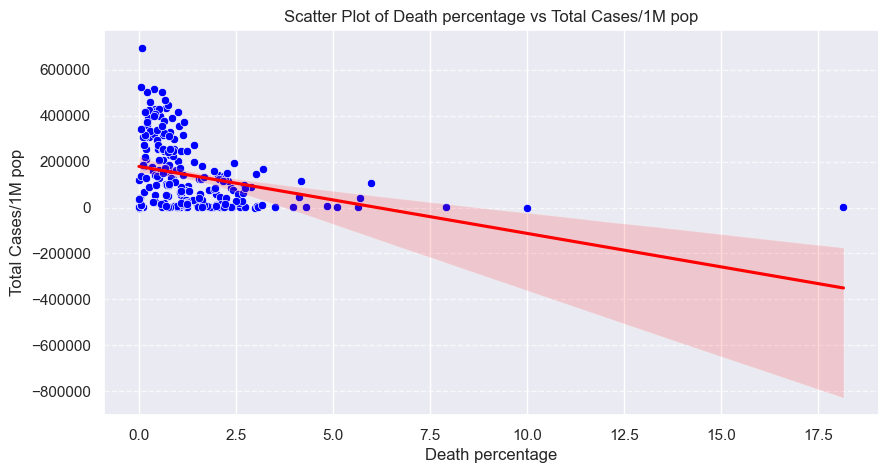

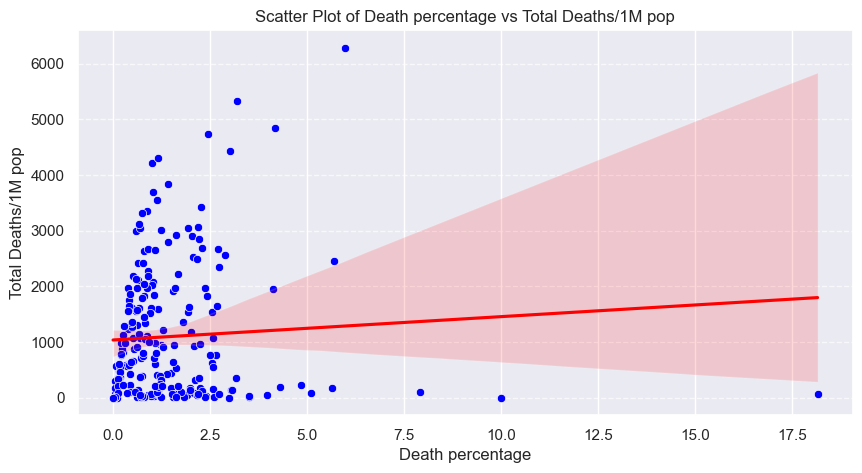

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of colors for each continent
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Add more colors if needed

# Get a list of numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Loop through each numeric column
for column_x in numeric_columns:
    for column_y in numeric_columns:
        if column_x != column_y:  # Skip if x and y are the same column
            plt.figure(figsize=(10, 5))
            color = colors[0]  # You can choose a color from the list
            sns.scatterplot(x=df[column_x], y=df[column_y], color=color)
            sns.regplot(x=df[column_x], y=df[column_y], scatter=False, color='red')  # Add regression line
            plt.title(f'Scatter Plot of {column_x} vs {column_y}')
            plt.xlabel(column_x)
            plt.ylabel(column_y)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

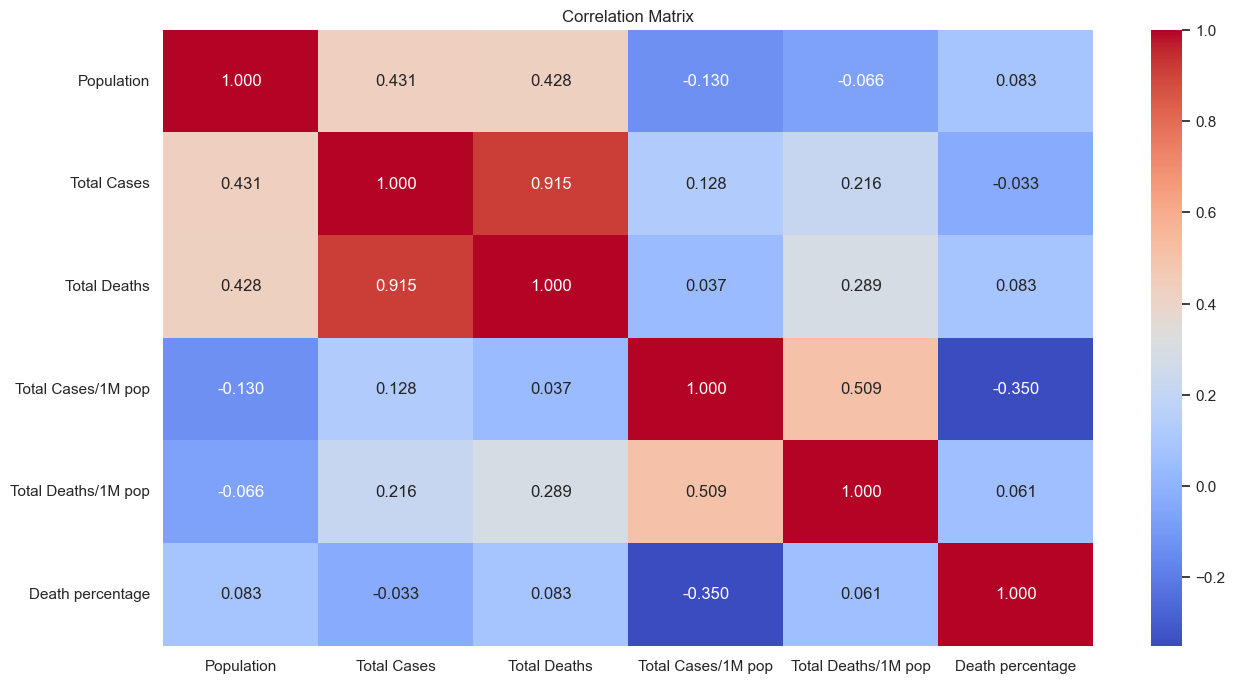

In [52]:
#Heatmap
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
cor = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

In [2]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = df['ISO 3166-1 alpha-3 CODE'],
    z = df['Total Cases'],
    text = df['Country'],
    colorscale = 'plasma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'COVID 19 cases in Millions',
))

fig.update_layout(
    title_text='Total COVID 19 Coronavirus cases',
    title_x = 0.50,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text="Source: Worldometer's global COVID-19 statistics",
        showarrow = False
)]
)
fig.show()

In [4]:
import plotly.offline as pyo

# Your existing code for creating the figure goes here

# Save the figure as HTML
html_output_path = 'covid_cases_map.html'
pyo.plot(fig, filename=html_output_path)


'covid_cases_map.html'